In [48]:
import arviz as av
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

resultDF = pd.read_csv('finalresult.csv')
inputDF = pd.read_csv('all_clean.csv')


thermalDF = inputDF[['Rtemp', 'bodyActivity','sumTemp','air_speed', 'clothLayer', 'wintTemp', 'Temp', 'weight', 
            'age', 'time', 'thermalComf', 'Humad', 'nigaThermal', 'tempNow']].copy()

airDF = inputDF[['o2','methane','ch2o','bodyActivity','ac_control','odor','co2','co','voc','air_speed','vent',
        'lpg','h2','odorUsually','airSpeedNow','alcohol','nitric','nigaAir','sleepy','Ventilation and Air smell']].copy()

visualDF = inputDF[['lightControl','colorComf','lightLevel','nigaLightQua','luminaireOFF','visualComf','lightColor',
           'daylight','lightLevelFeel','BlindOFF','building_image','age']].copy()

AcousticDF = inputDF[['nigaNoise','noiseNow','outNoise','AcousComfort','backgNoise','people_Noise','peaople_sound',
             'noiseGenarally','age']].copy()

thermalComf = thermalDF.iloc[:,[4,12,13,2,5,3,6,11,0]]
metabolism =  thermalDF.iloc[:,[8,1,7,9]]

airQual = airDF.iloc[:,[0,1,2,5,6,7,8,9,11,12,15,16,17,19]]                 
airComf = airDF.iloc[:,[3,4,5,10,13,14,18,19]]
                   
lightlevelva = visualDF.iloc[:,[0,2,4,7,9]]
visualComf = visualDF.iloc[:,[1,3,5,6,8,10,11]]

AuralComf = AcousticDF.copy()
lightlevelva.head()


lightControl  lightLevel  luminaireOFF  daylight  BlindOFF
0             1     437.580             0         1         1
1             0     437.965             0         0         0
2             1     440.945             0         0         1
3             1     437.500             0         0         1
4             0     437.945             0         0         1

In [47]:
print(thermalComf.shape)

(3164, 9)


In [3]:
resultDF.iloc[:, 176: 196].head()

visual_a6  visual_a7  visual_cons  acous_a1  acous_a2  acous_a3  acous_a4  \
0   0.058892  -0.242064     0.915982 -0.322206  0.624146 -0.006327  0.129194   
1   0.054939  -0.225941     0.924976 -0.314092  0.557193  0.000997 -0.138130   
2   0.028400  -0.245035     0.867162 -0.226682  0.399837 -0.002633 -0.066231   
3   0.051947  -0.324939     0.781286 -0.290980  0.337713  0.010126  0.357783   
4   0.055966  -0.398401     0.275330 -0.226396  0.472464  0.000703  0.569132   

   acous_a5  acous_a6  acous_a7  acous_cons  alfa_DayL.1  vocCons_mu  \
0 -0.437820 -0.000334  0.156279    0.896511     0.124955     1.71354   
1 -0.206673  0.000455  0.220627    0.906405     0.135778     1.70047   
2 -0.146385 -0.002339  0.314644    0.580883     0.133283     1.73763   
3 -0.411717 -0.000119  0.268108    0.204813     0.127985     1.73763   
4 -0.745801 -0.004403  0.282597    0.642478     0.112750     1.72732   

   airQualityComf_mu  thermal_isolation_mu  bComfort_mu  ventSystem_mu  \
0          -0.024826              0.033866     -1.09367      -0.087402   
1          -0.022274              0.036089     -1.11551      -0.076055   
2          -0.025670              0.039621     -1.12512      -0.080636   
3          -0.029066              0.020646     -1.13462      -0.082137   
4          -0.023318              0.026738     -1.18394      -0.090799   

   AcousComfort_mu  acSystem_mu  mean_acou_isolation_mu  
0         0.064342      6.07971                 10.0008  
1         0.064385      6.08977                 10.0047  
2         0.075515      6.21530                 10.0045  
3         0.074836      6.30490                 10.0113  
4         0.088006      6.72094                 10.0008

In [4]:
resultDF.head()

Unnamed: 0          lp__  ageTheta.1  ageTheta.2  ageTheta.3  timeTheta.1  \
0           0 -2.863730e+09    0.712775    0.242061    0.045164     0.000185   
1           1 -2.863730e+09    0.712637    0.240167    0.047196     0.000820   
2           2 -2.863730e+09    0.713946    0.232759    0.053295     0.000292   
3           3 -2.863730e+09    0.715989    0.229756    0.054255     0.001038   
4           4 -2.863730e+09    0.708673    0.240415    0.050912     0.000004   

   timeTheta.2  timeTheta.3  timeTheta.4  timeTheta.5  ...  vocCons_mu  \
0     0.122068     0.349407     0.314454     0.212320  ...     1.71354   
1     0.120329     0.355850     0.312544     0.208718  ...     1.70047   
2     0.128285     0.327953     0.323874     0.216590  ...     1.73763   
3     0.130298     0.340277     0.320794     0.204067  ...     1.73763   
4     0.111440     0.326926     0.323266     0.235572  ...     1.72732   

   airQualityComf_mu  thermal_isolation_mu  bComfort_mu  ventSystem_mu  \
0          -0.024826              0.033866     -1.09367      -0.087402   
1          -0.022274              0.036089     -1.11551      -0.076055   
2          -0.025670              0.039621     -1.12512      -0.080636   
3          -0.029066              0.020646     -1.13462      -0.082137   
4          -0.023318              0.026738     -1.18394      -0.090799   

   AcousComfort_mu  acSystem_mu  mean_acou_isolation_mu  visualComf_mu  \
0         0.064342      6.07971                 10.0008       0.082088   
1         0.064385      6.08977                 10.0047       0.078420   
2         0.075515      6.21530                 10.0045       0.059953   
3         0.074836      6.30490                 10.0113       0.081077   
4         0.088006      6.72094                 10.0008       0.035528   

   thermalComf_mu  
0        0.040604  
1        0.028789  
2        0.029376  
3        0.026926  
4       -0.020346  

[5 rows x 198 columns]

In [20]:
 resultDF['acou_isolation.1'].head()

0   -0.488311
1    0.023544
2   -1.364990
3   -0.602500
4   -0.040710
Name: acou_isolation.1, dtype: float64

In [25]:
OUtputResultTotalDF = resultDF[['metabolism.1', 'artLights.1', 'visualComf.1', 'AcousComfort.1', 'vocCons.1', 'airQuality.1', 'bComfort.1', 
                                'thermal_isolation.1', 'acSystem.1', 'ventSystem.1', 'airQualityComf.1', 'thermalComf.1', 'acou_isolation.1']].copy()

In [28]:
OUtputResultmeanDF = resultDF[['vocCons_mu', 'airQualityComf_mu', 'bComfort_mu', 'thermal_isolation_mu', 'ventSystem_mu', 'AcousComfort_mu'
                            , 'acSystem_mu', 'mean_acou_isolation_mu', 'visualComf_mu', 'thermalComf_mu']].copy()

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

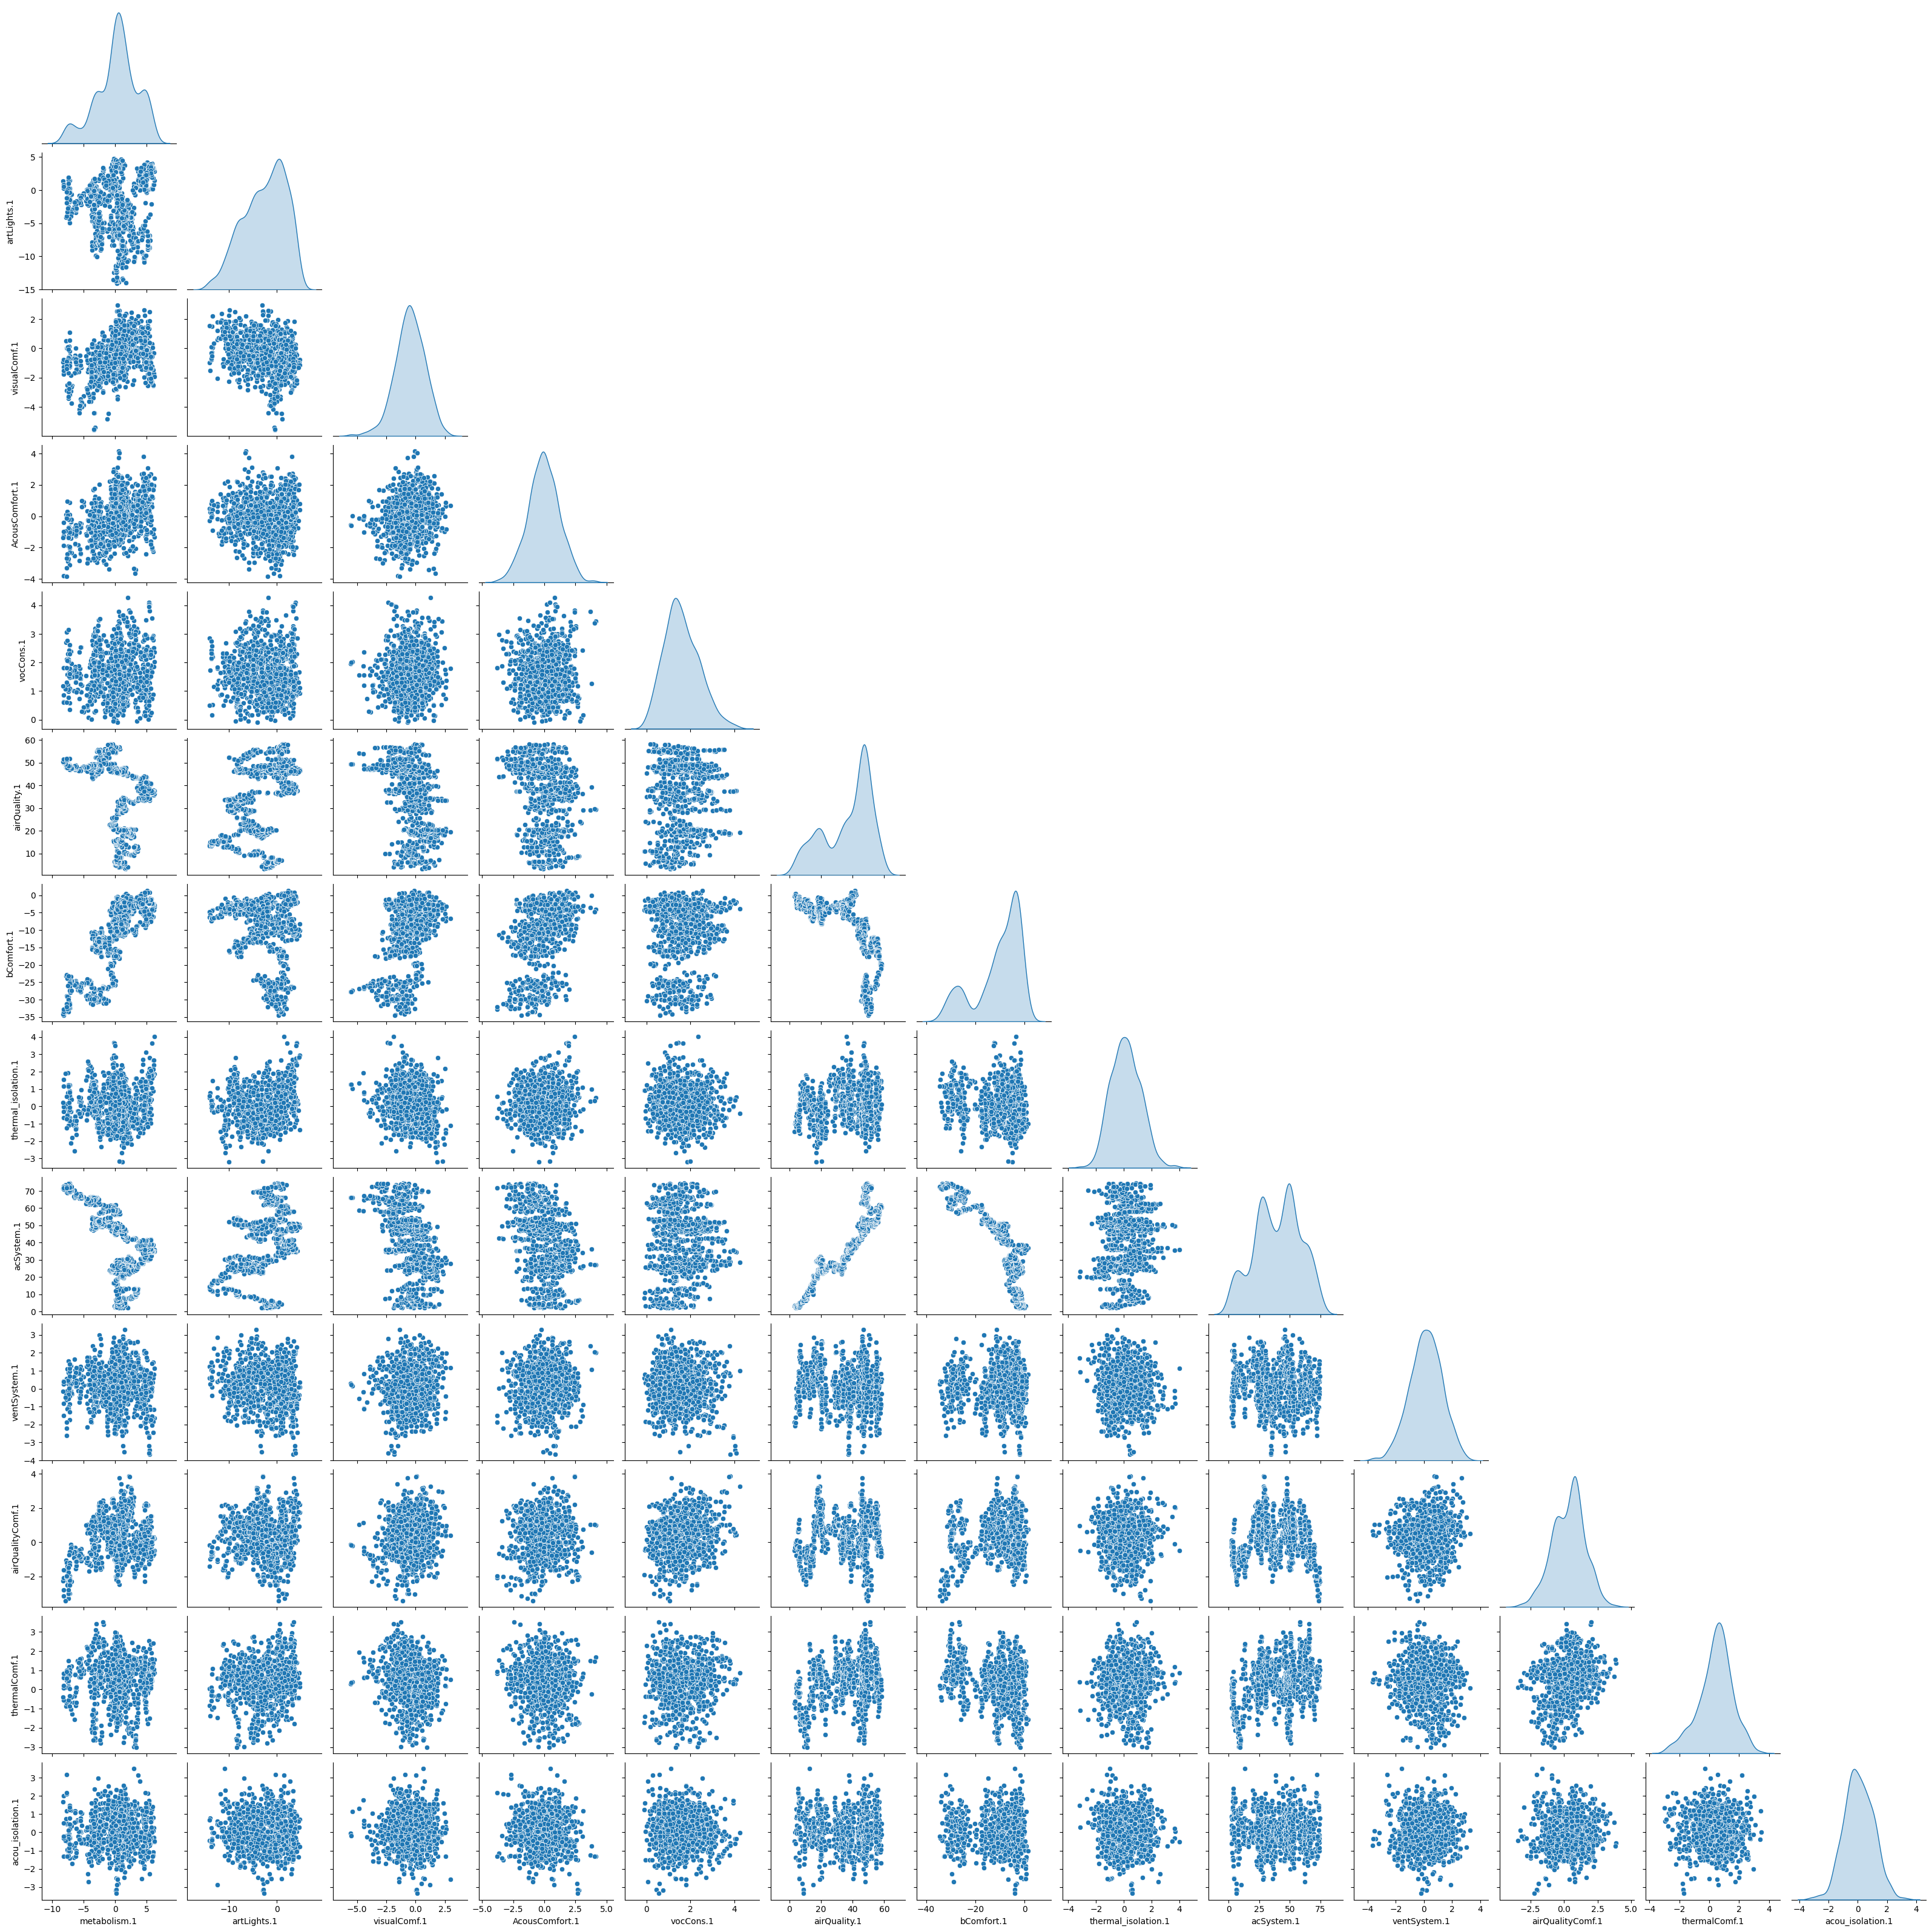

In [27]:
g = sns.pairplot(OUtputResultTotalDF, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

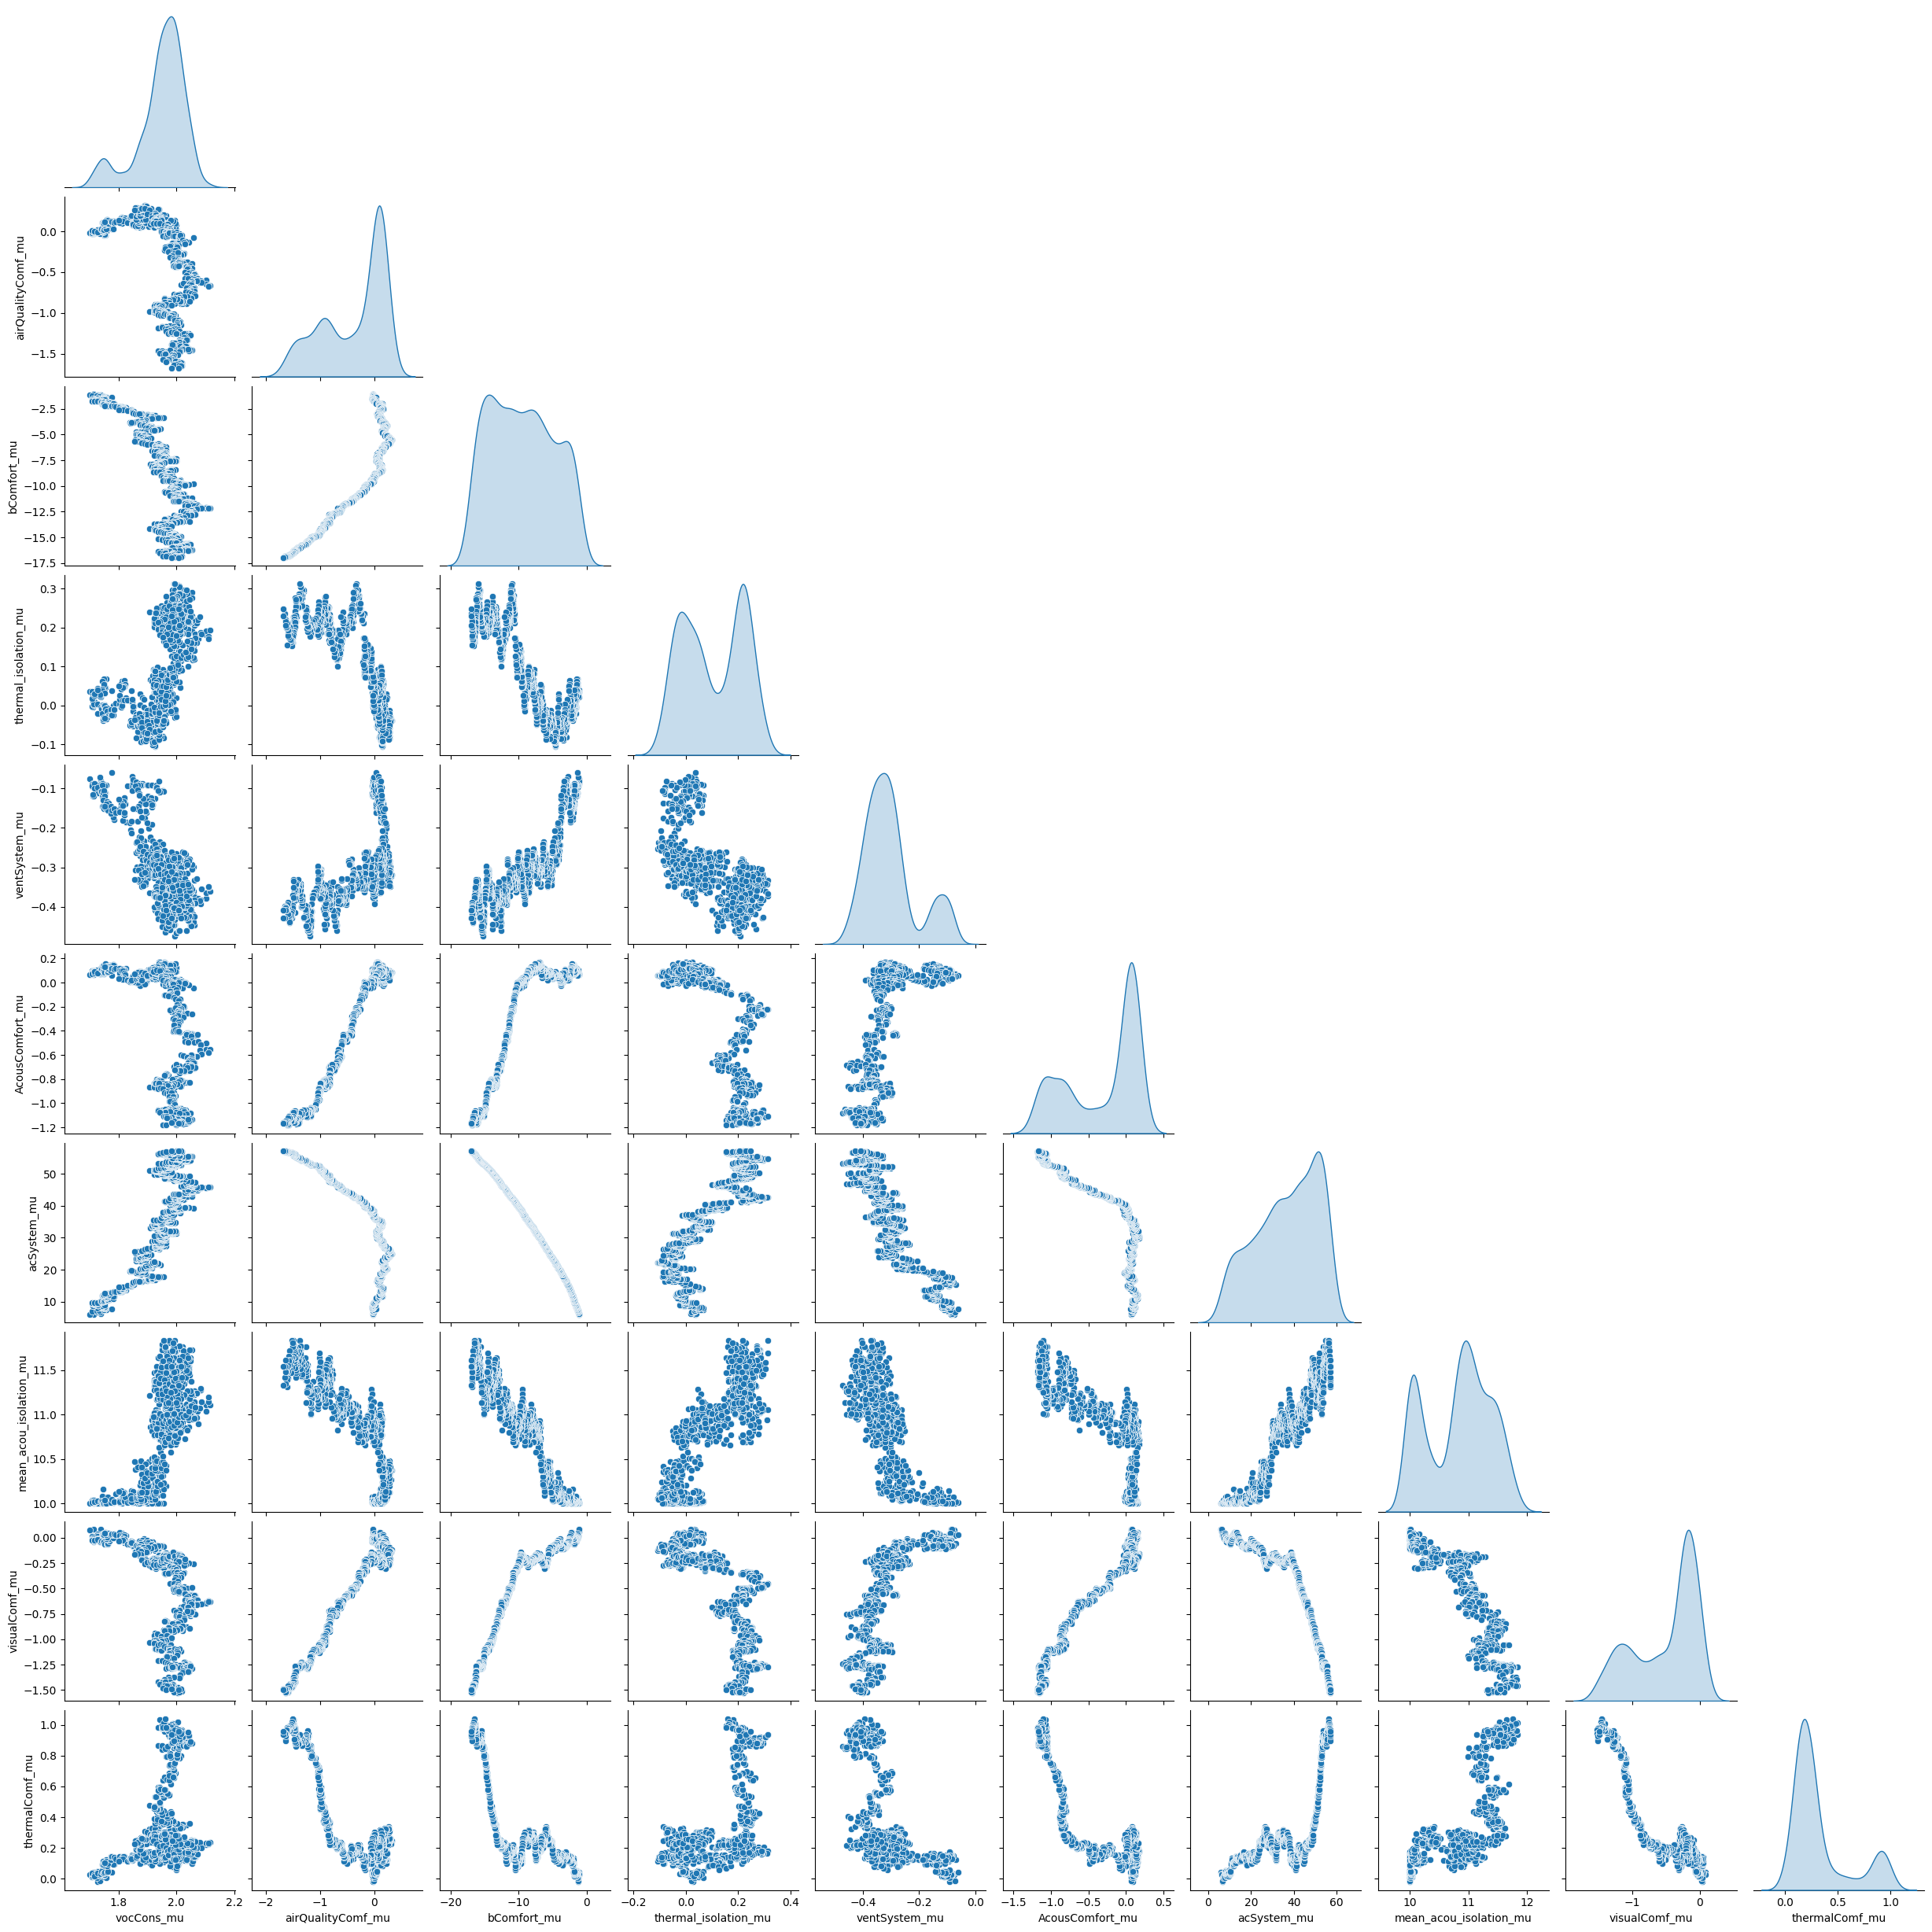

In [29]:
g = sns.pairplot(OUtputResultmeanDF, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

(3164, 9)


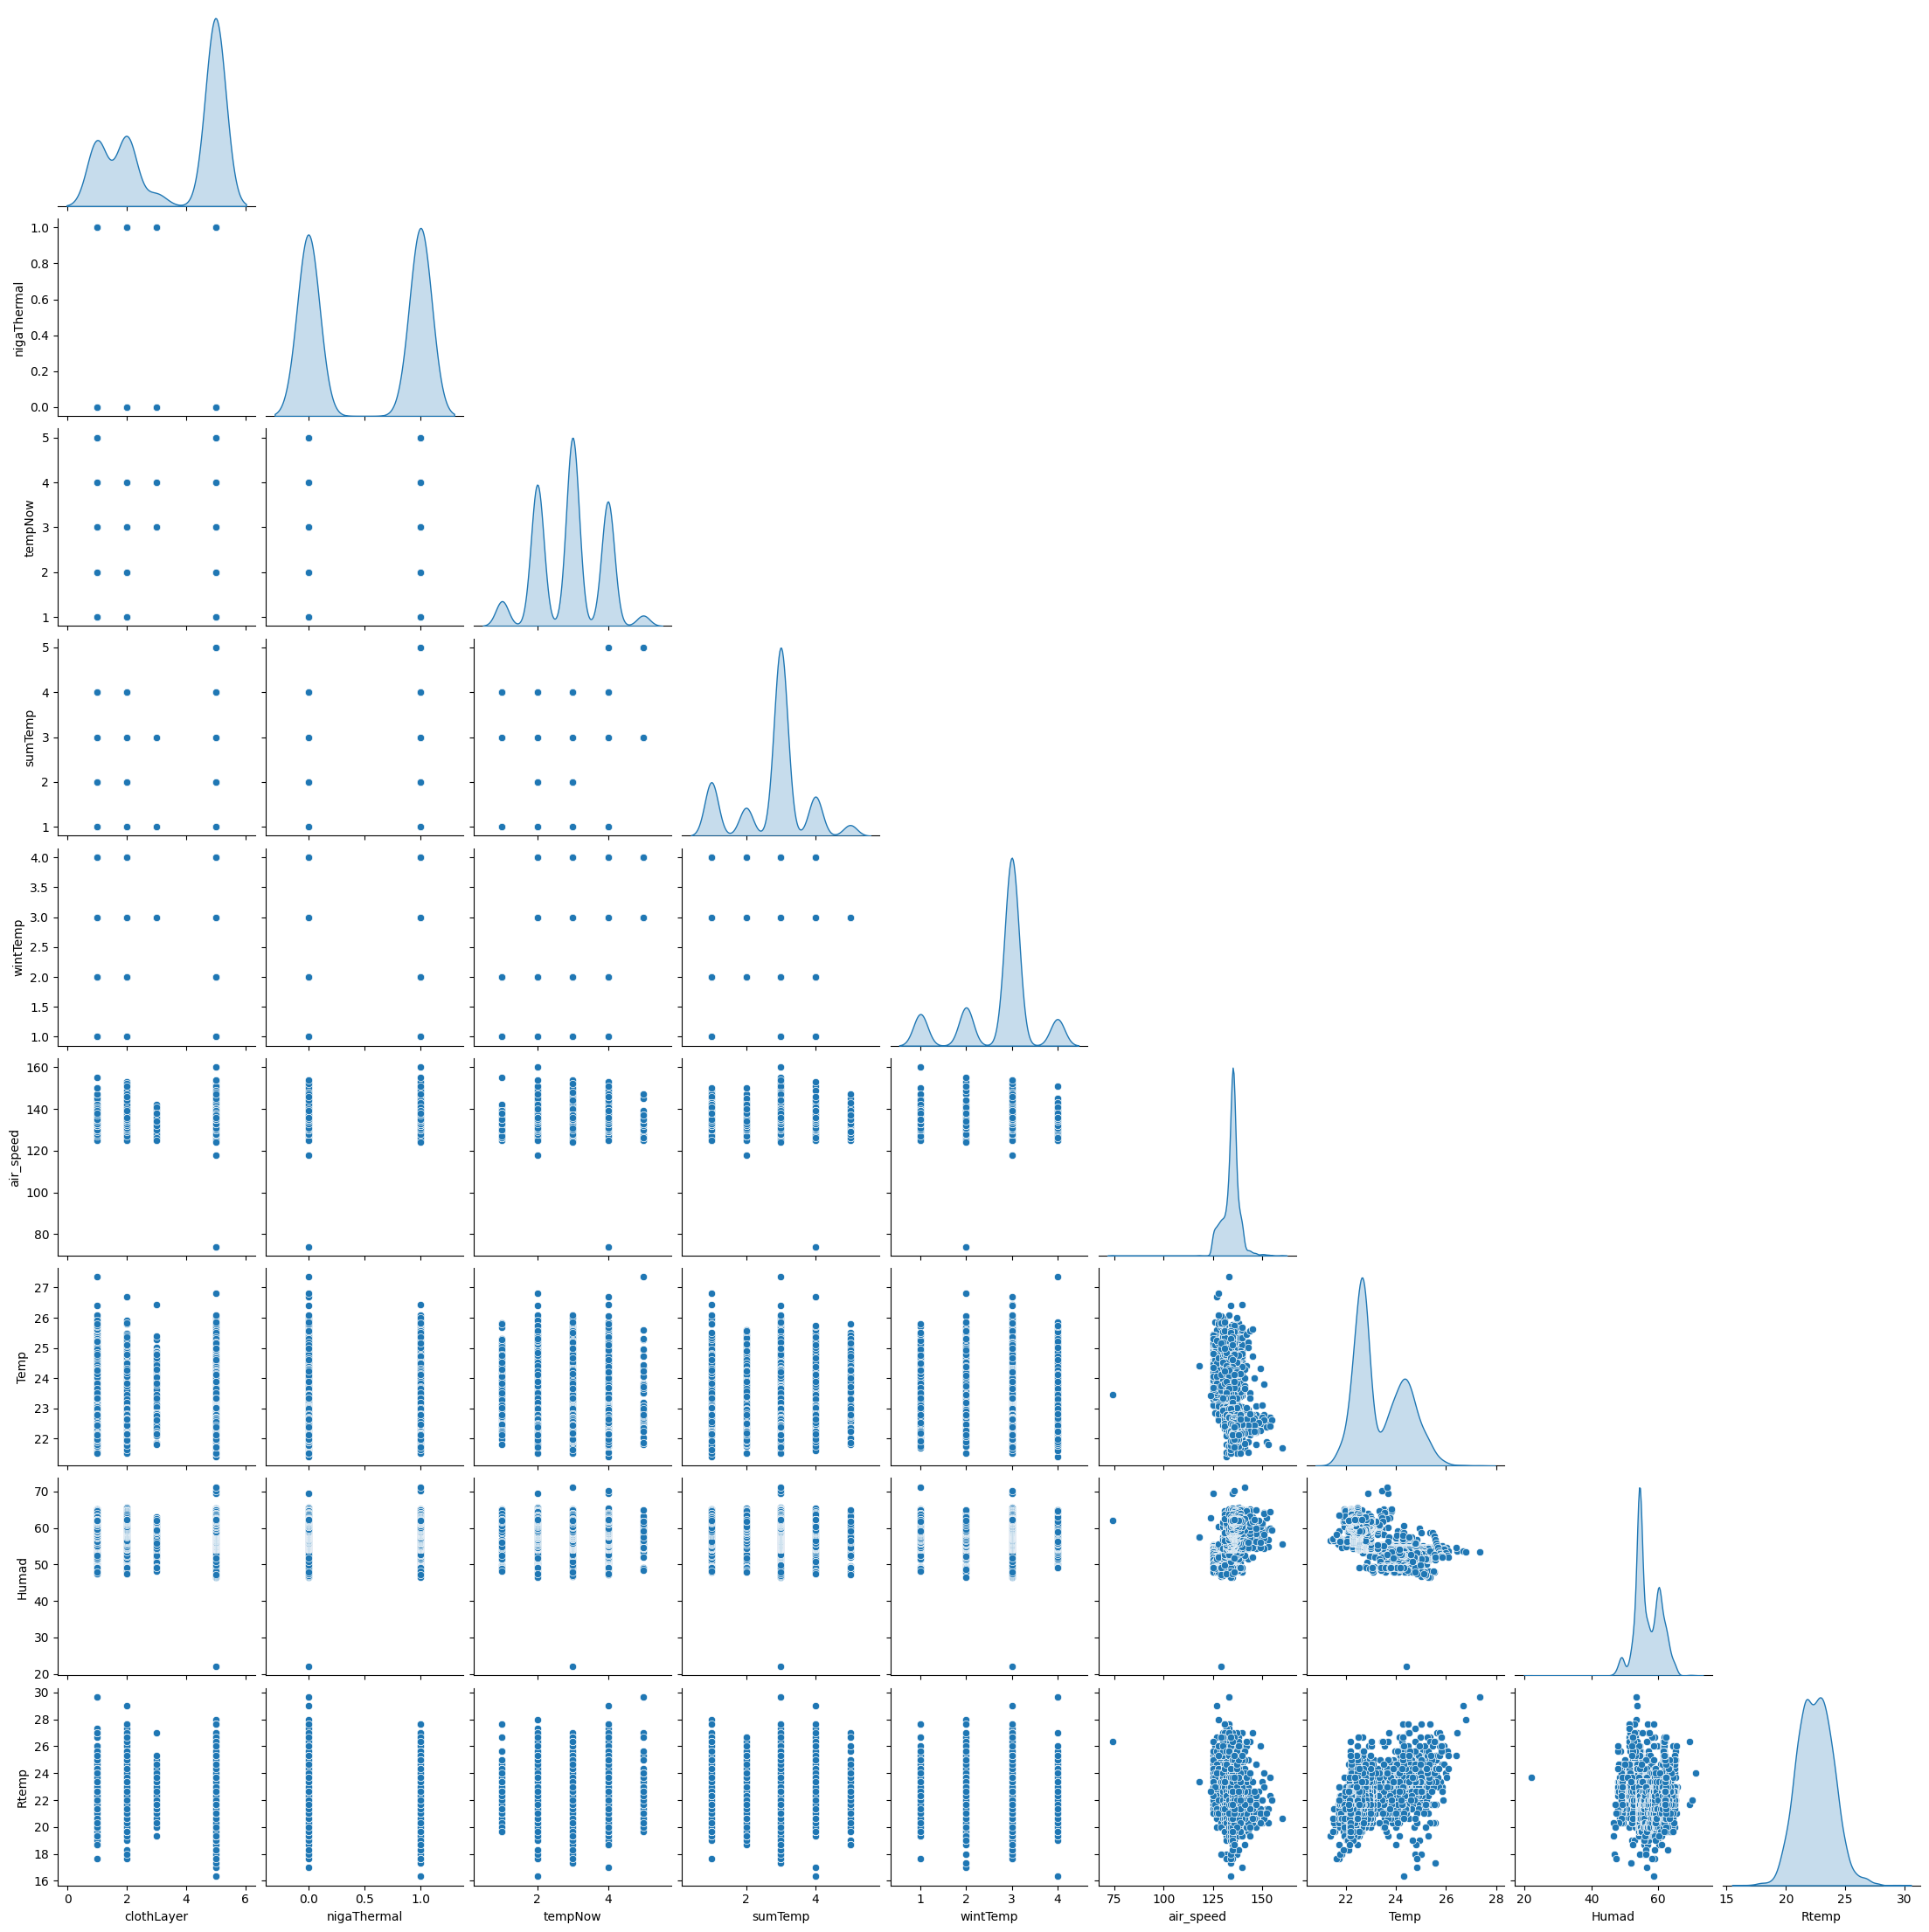

In [49]:
g = sns.pairplot(thermalComf, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )
print(thermalComf.shape)

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

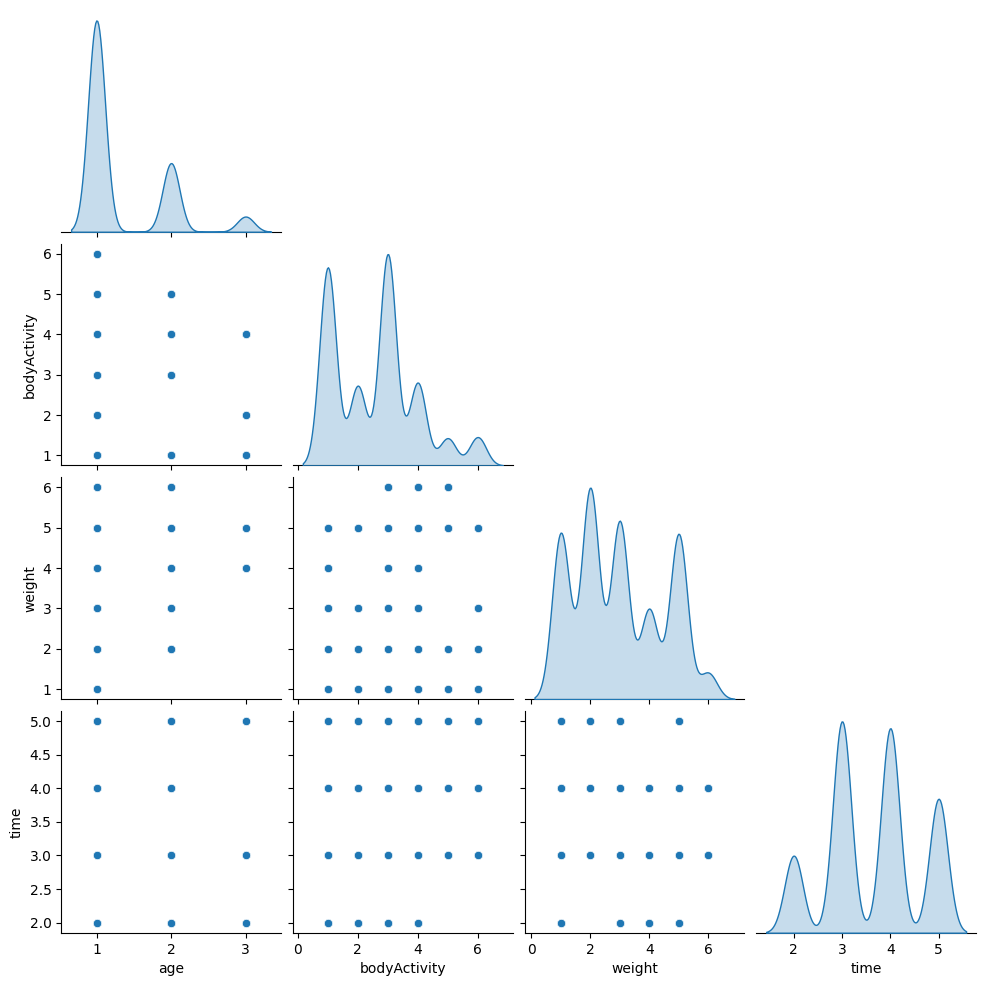

In [50]:
g = sns.pairplot(metabolism, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

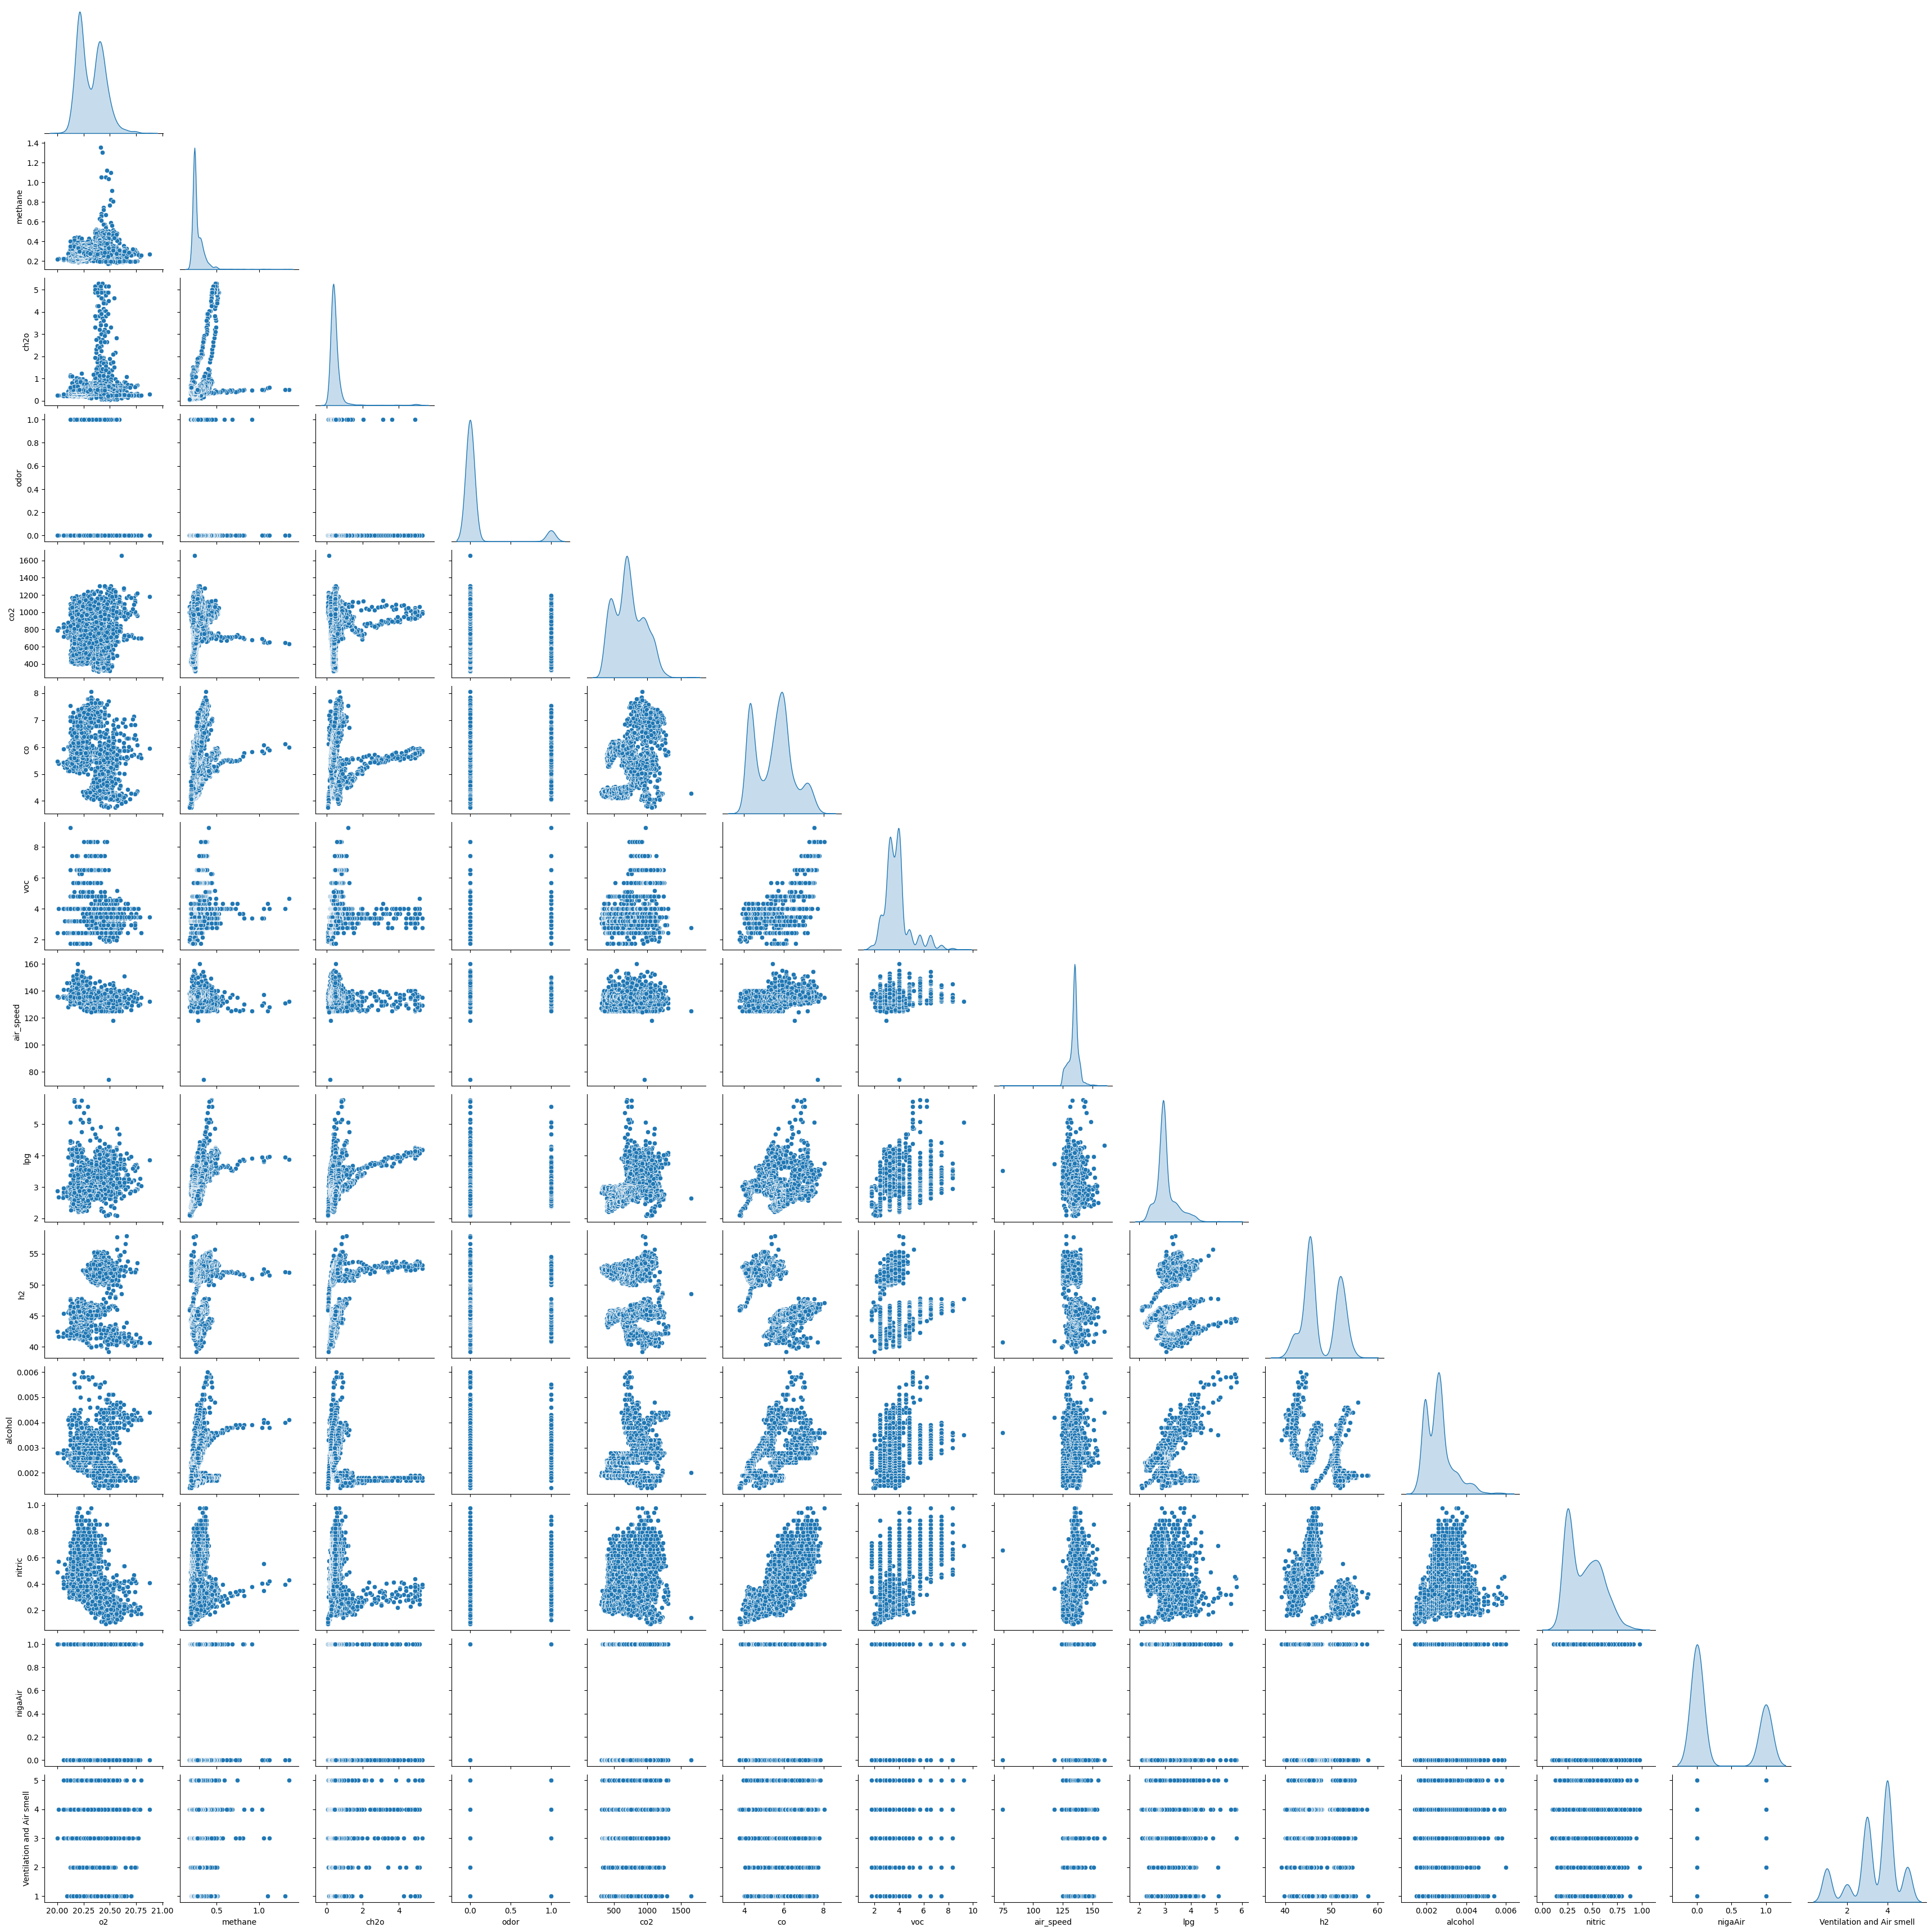

In [51]:
g = sns.pairplot(airQual, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

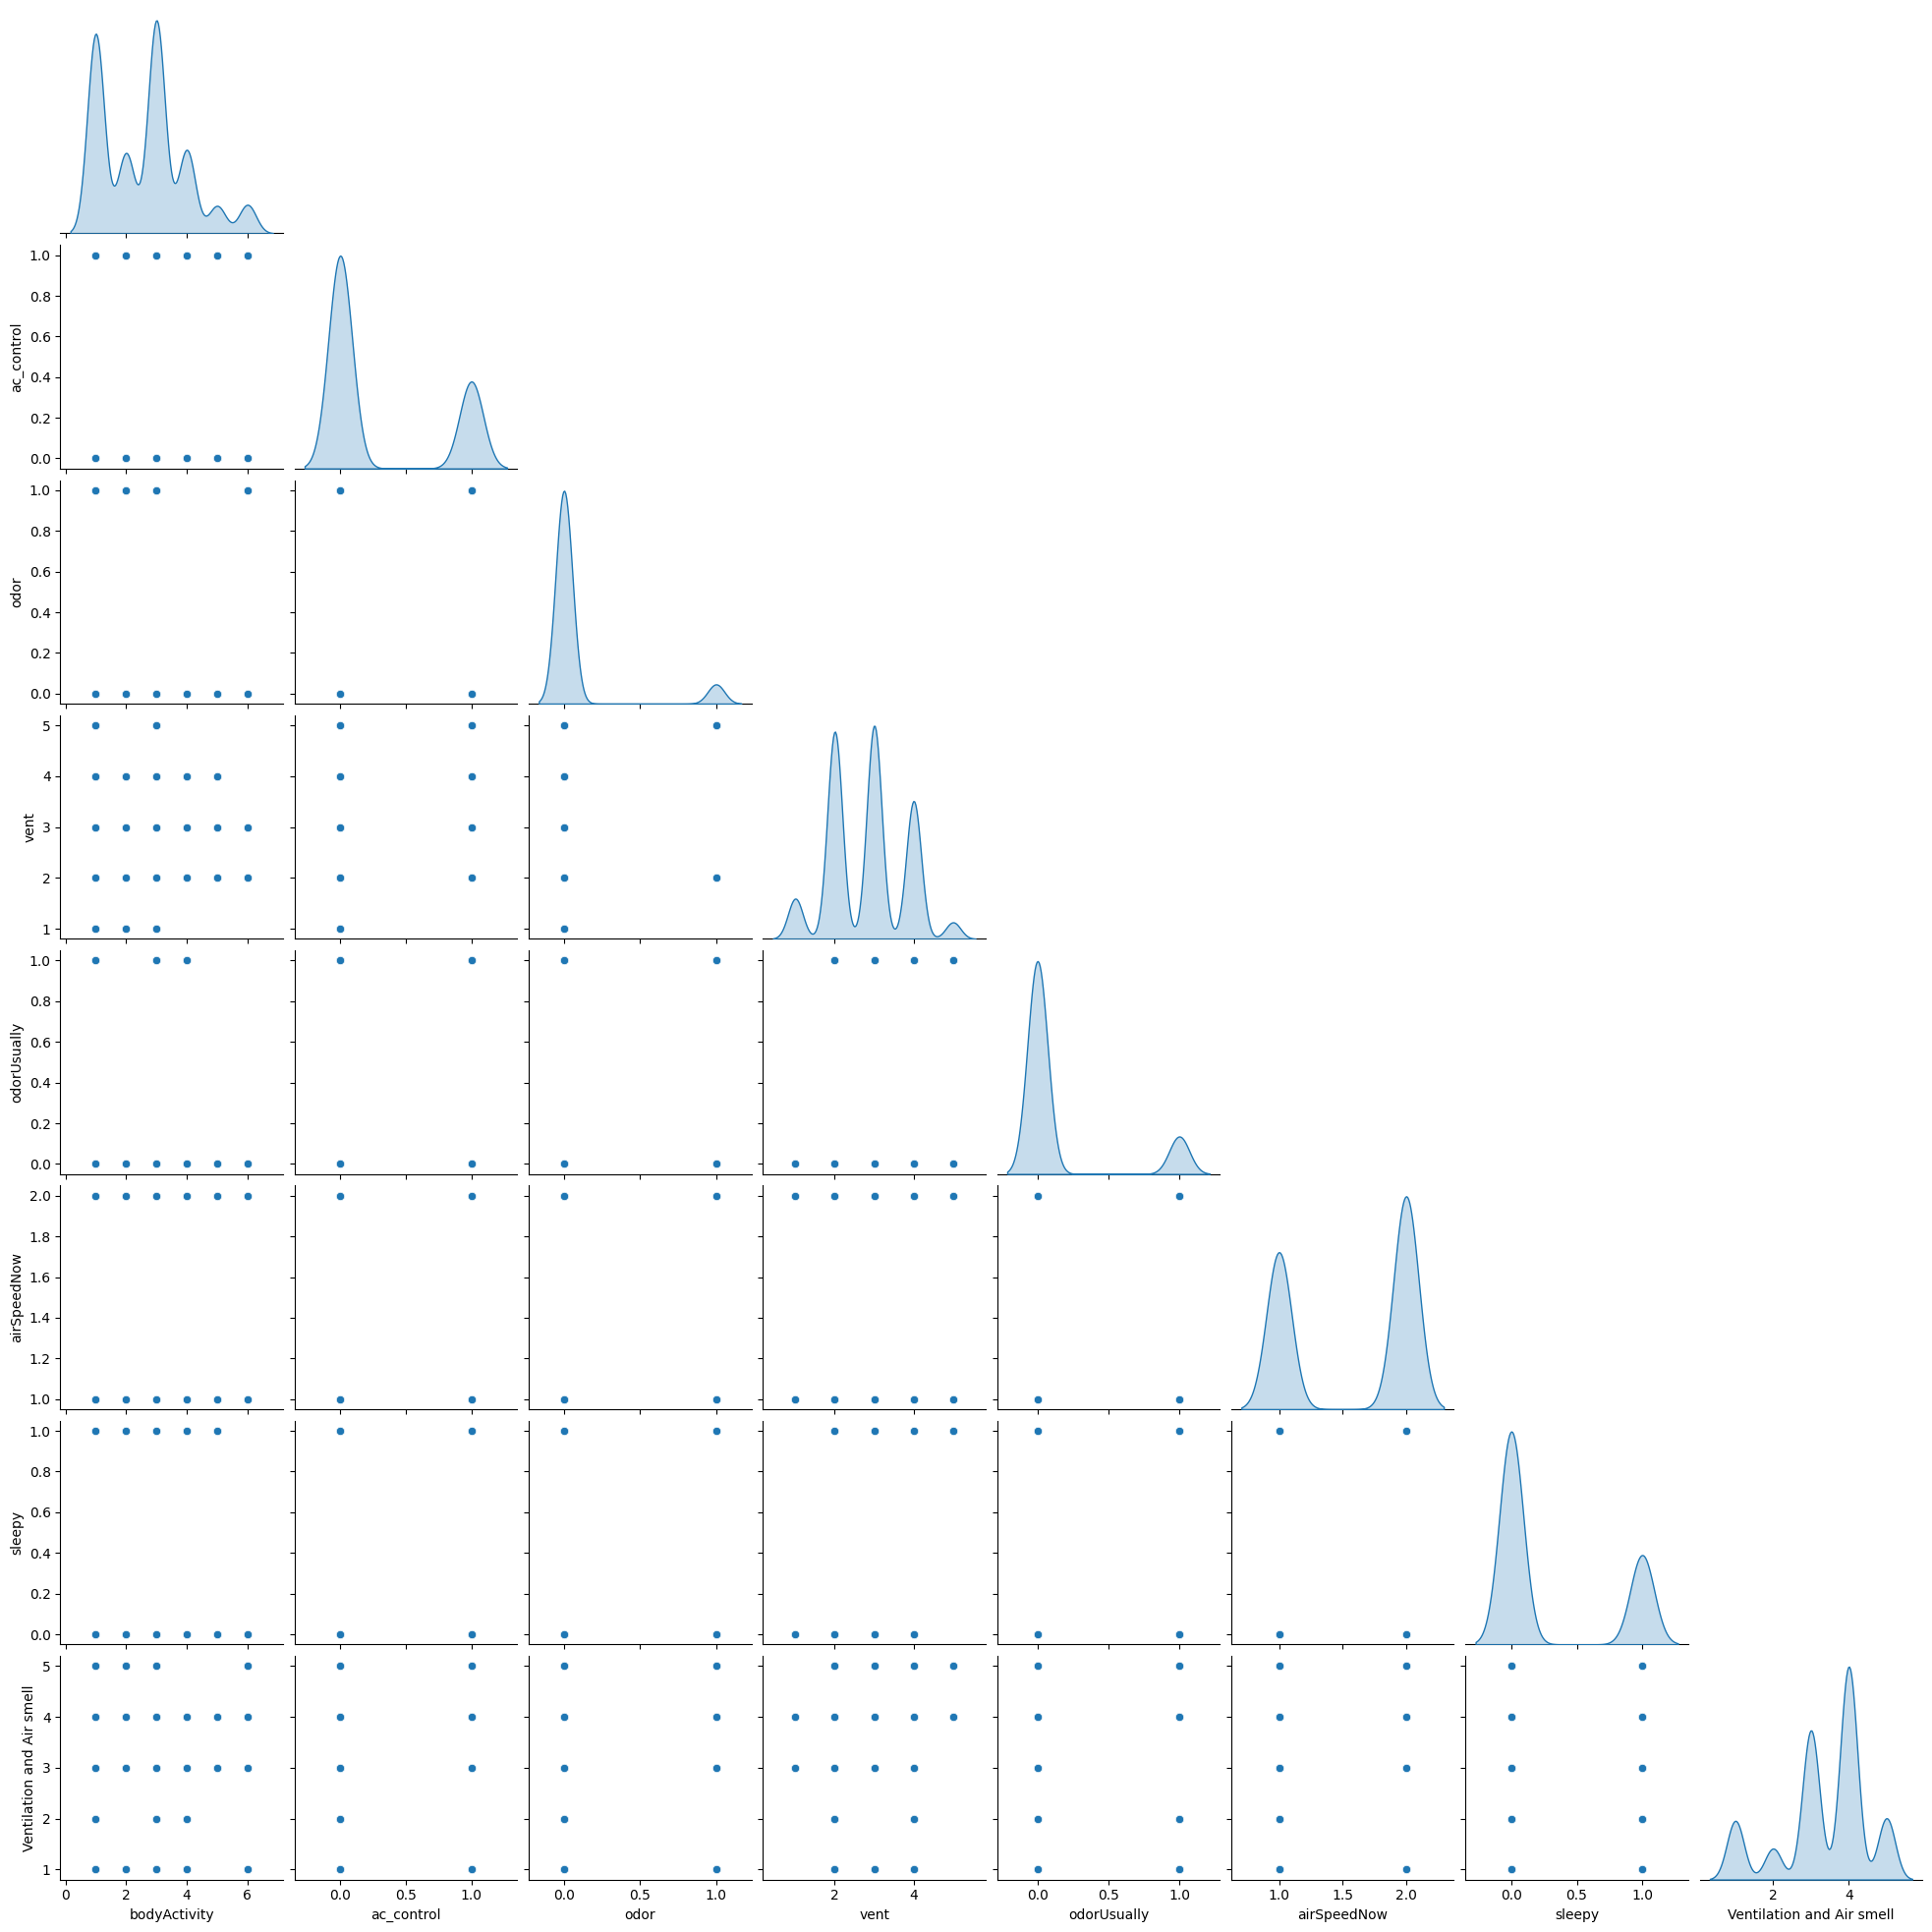

In [55]:
g = sns.pairplot(airComf, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

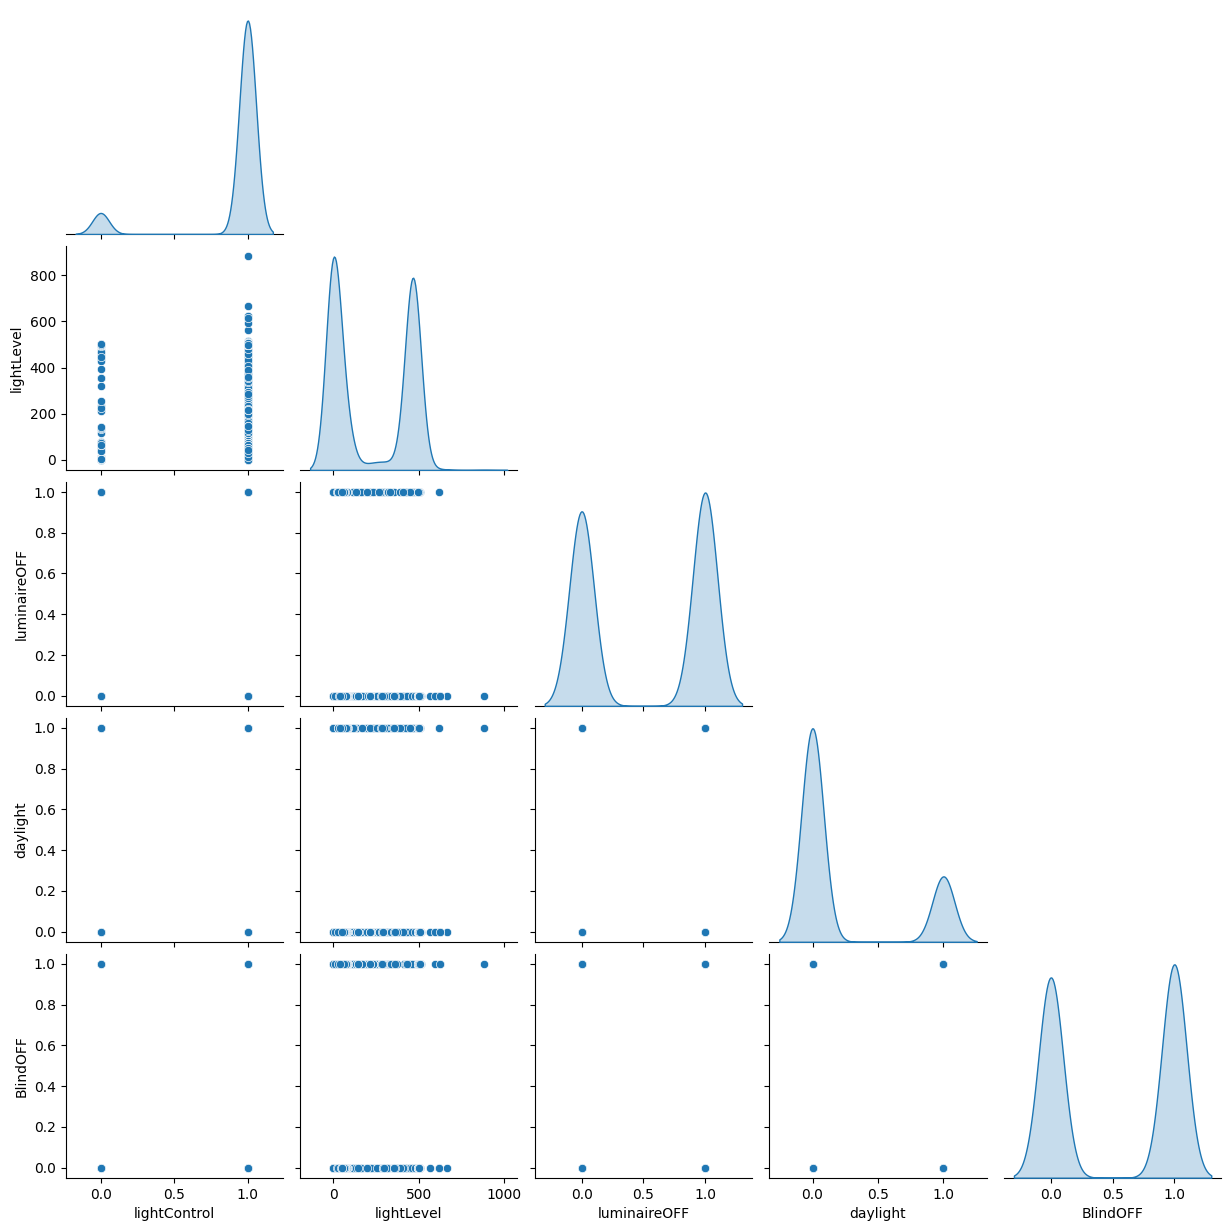

In [56]:
g = sns.pairplot(lightlevelva, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

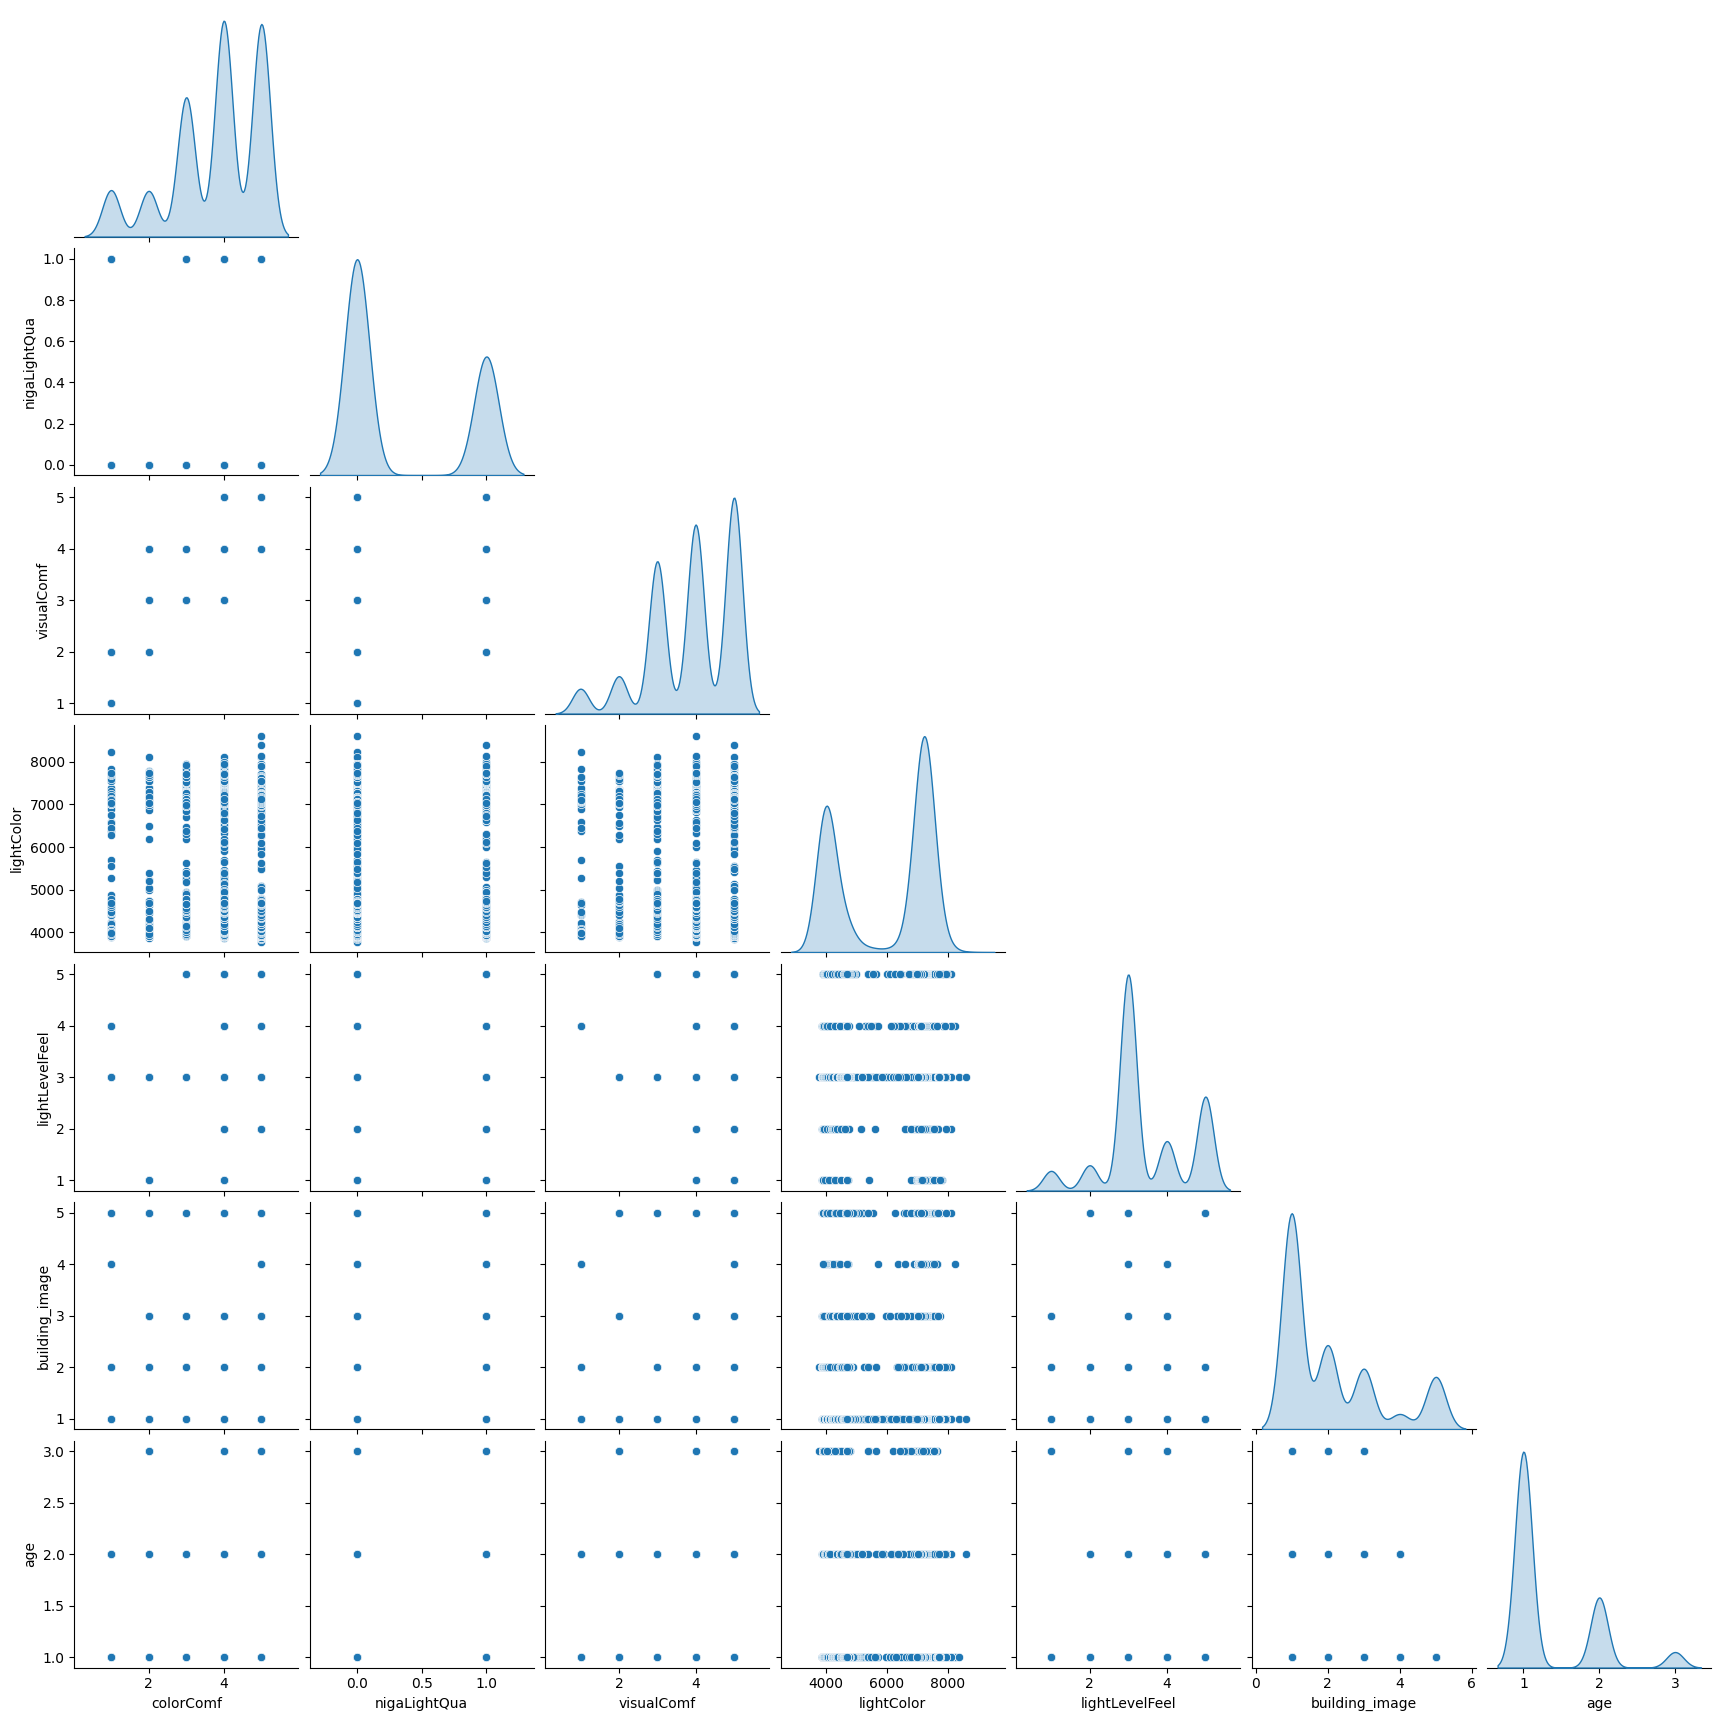

In [53]:
g = sns.pairplot(visualComf, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_B

(3164, 9)


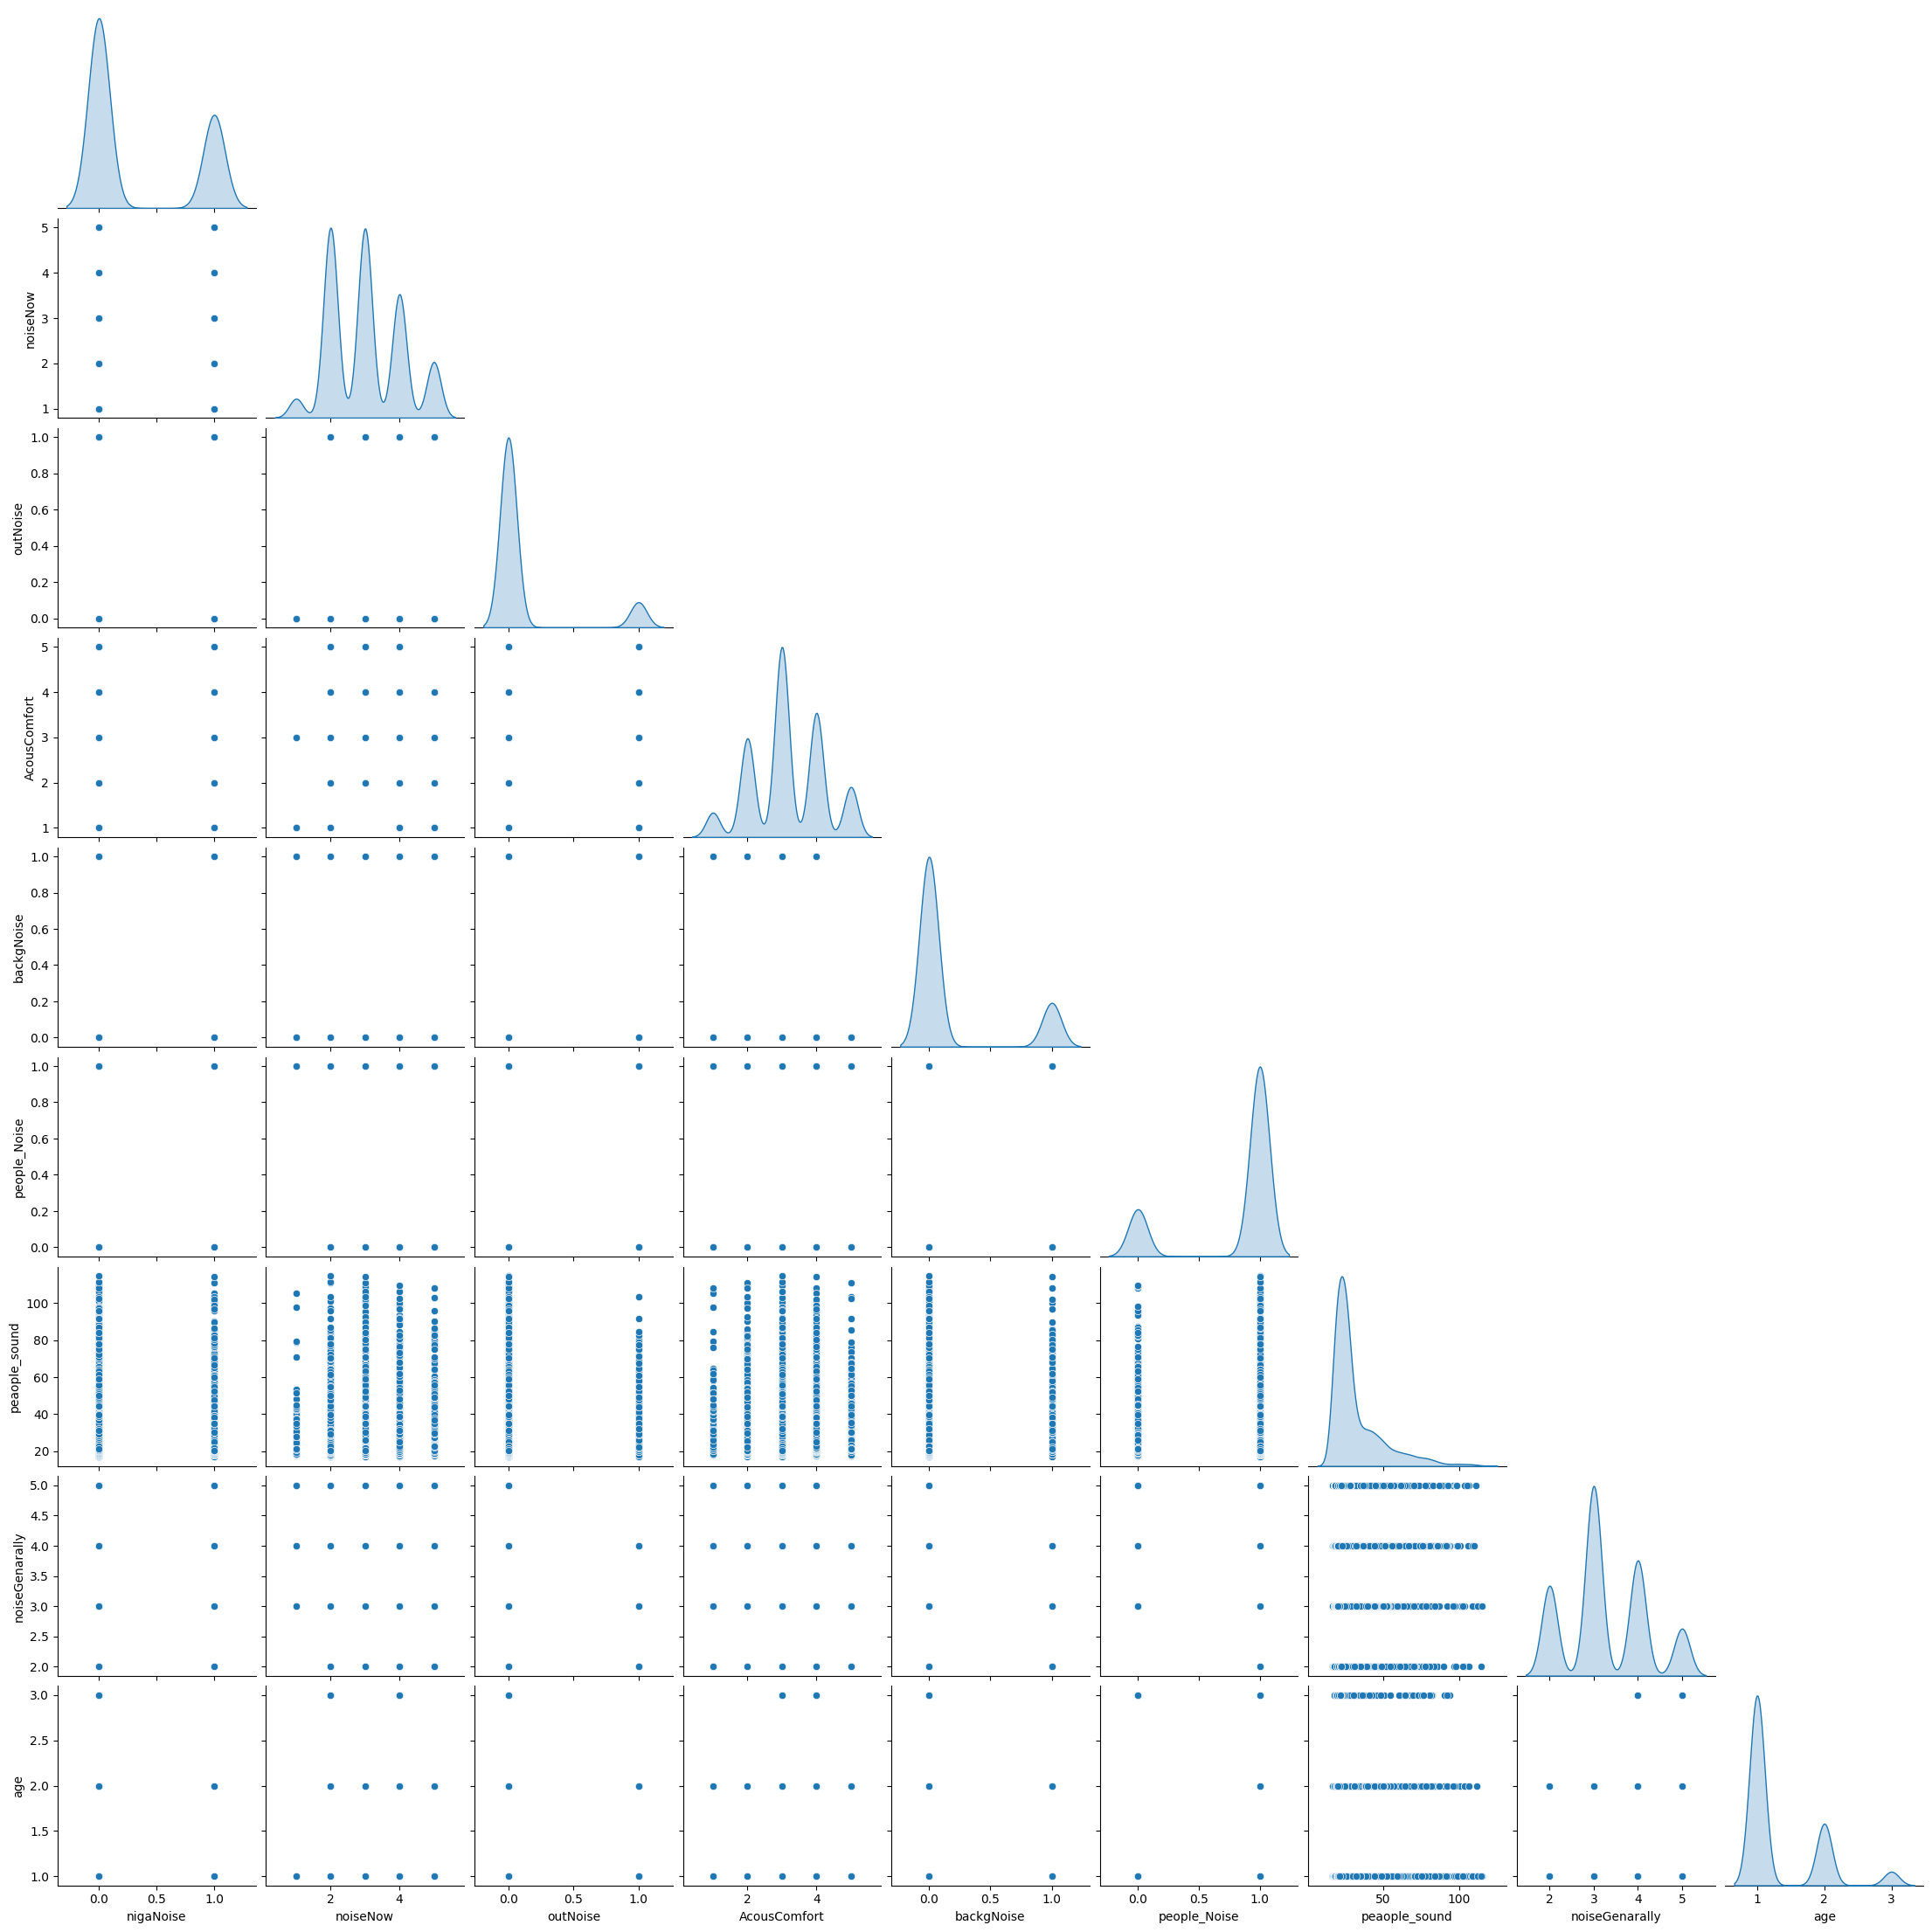

In [61]:
g = sns.pairplot(AuralComf, 
                     #hue="nigaAir", 
                     #hue_order ='',
                     palette = sns.color_palette("husl",3),
                     #kind="kde", 
                     diag_kind="kde", 
                     markers=["o", "s", "D"], 
                     corner=True,
                     #diag_kws = 'grid_kws', 
                     #grid_kws = 'grid_kws',
                     dropna=True
                )
print(AuralComf.shape)

(3164, 9)


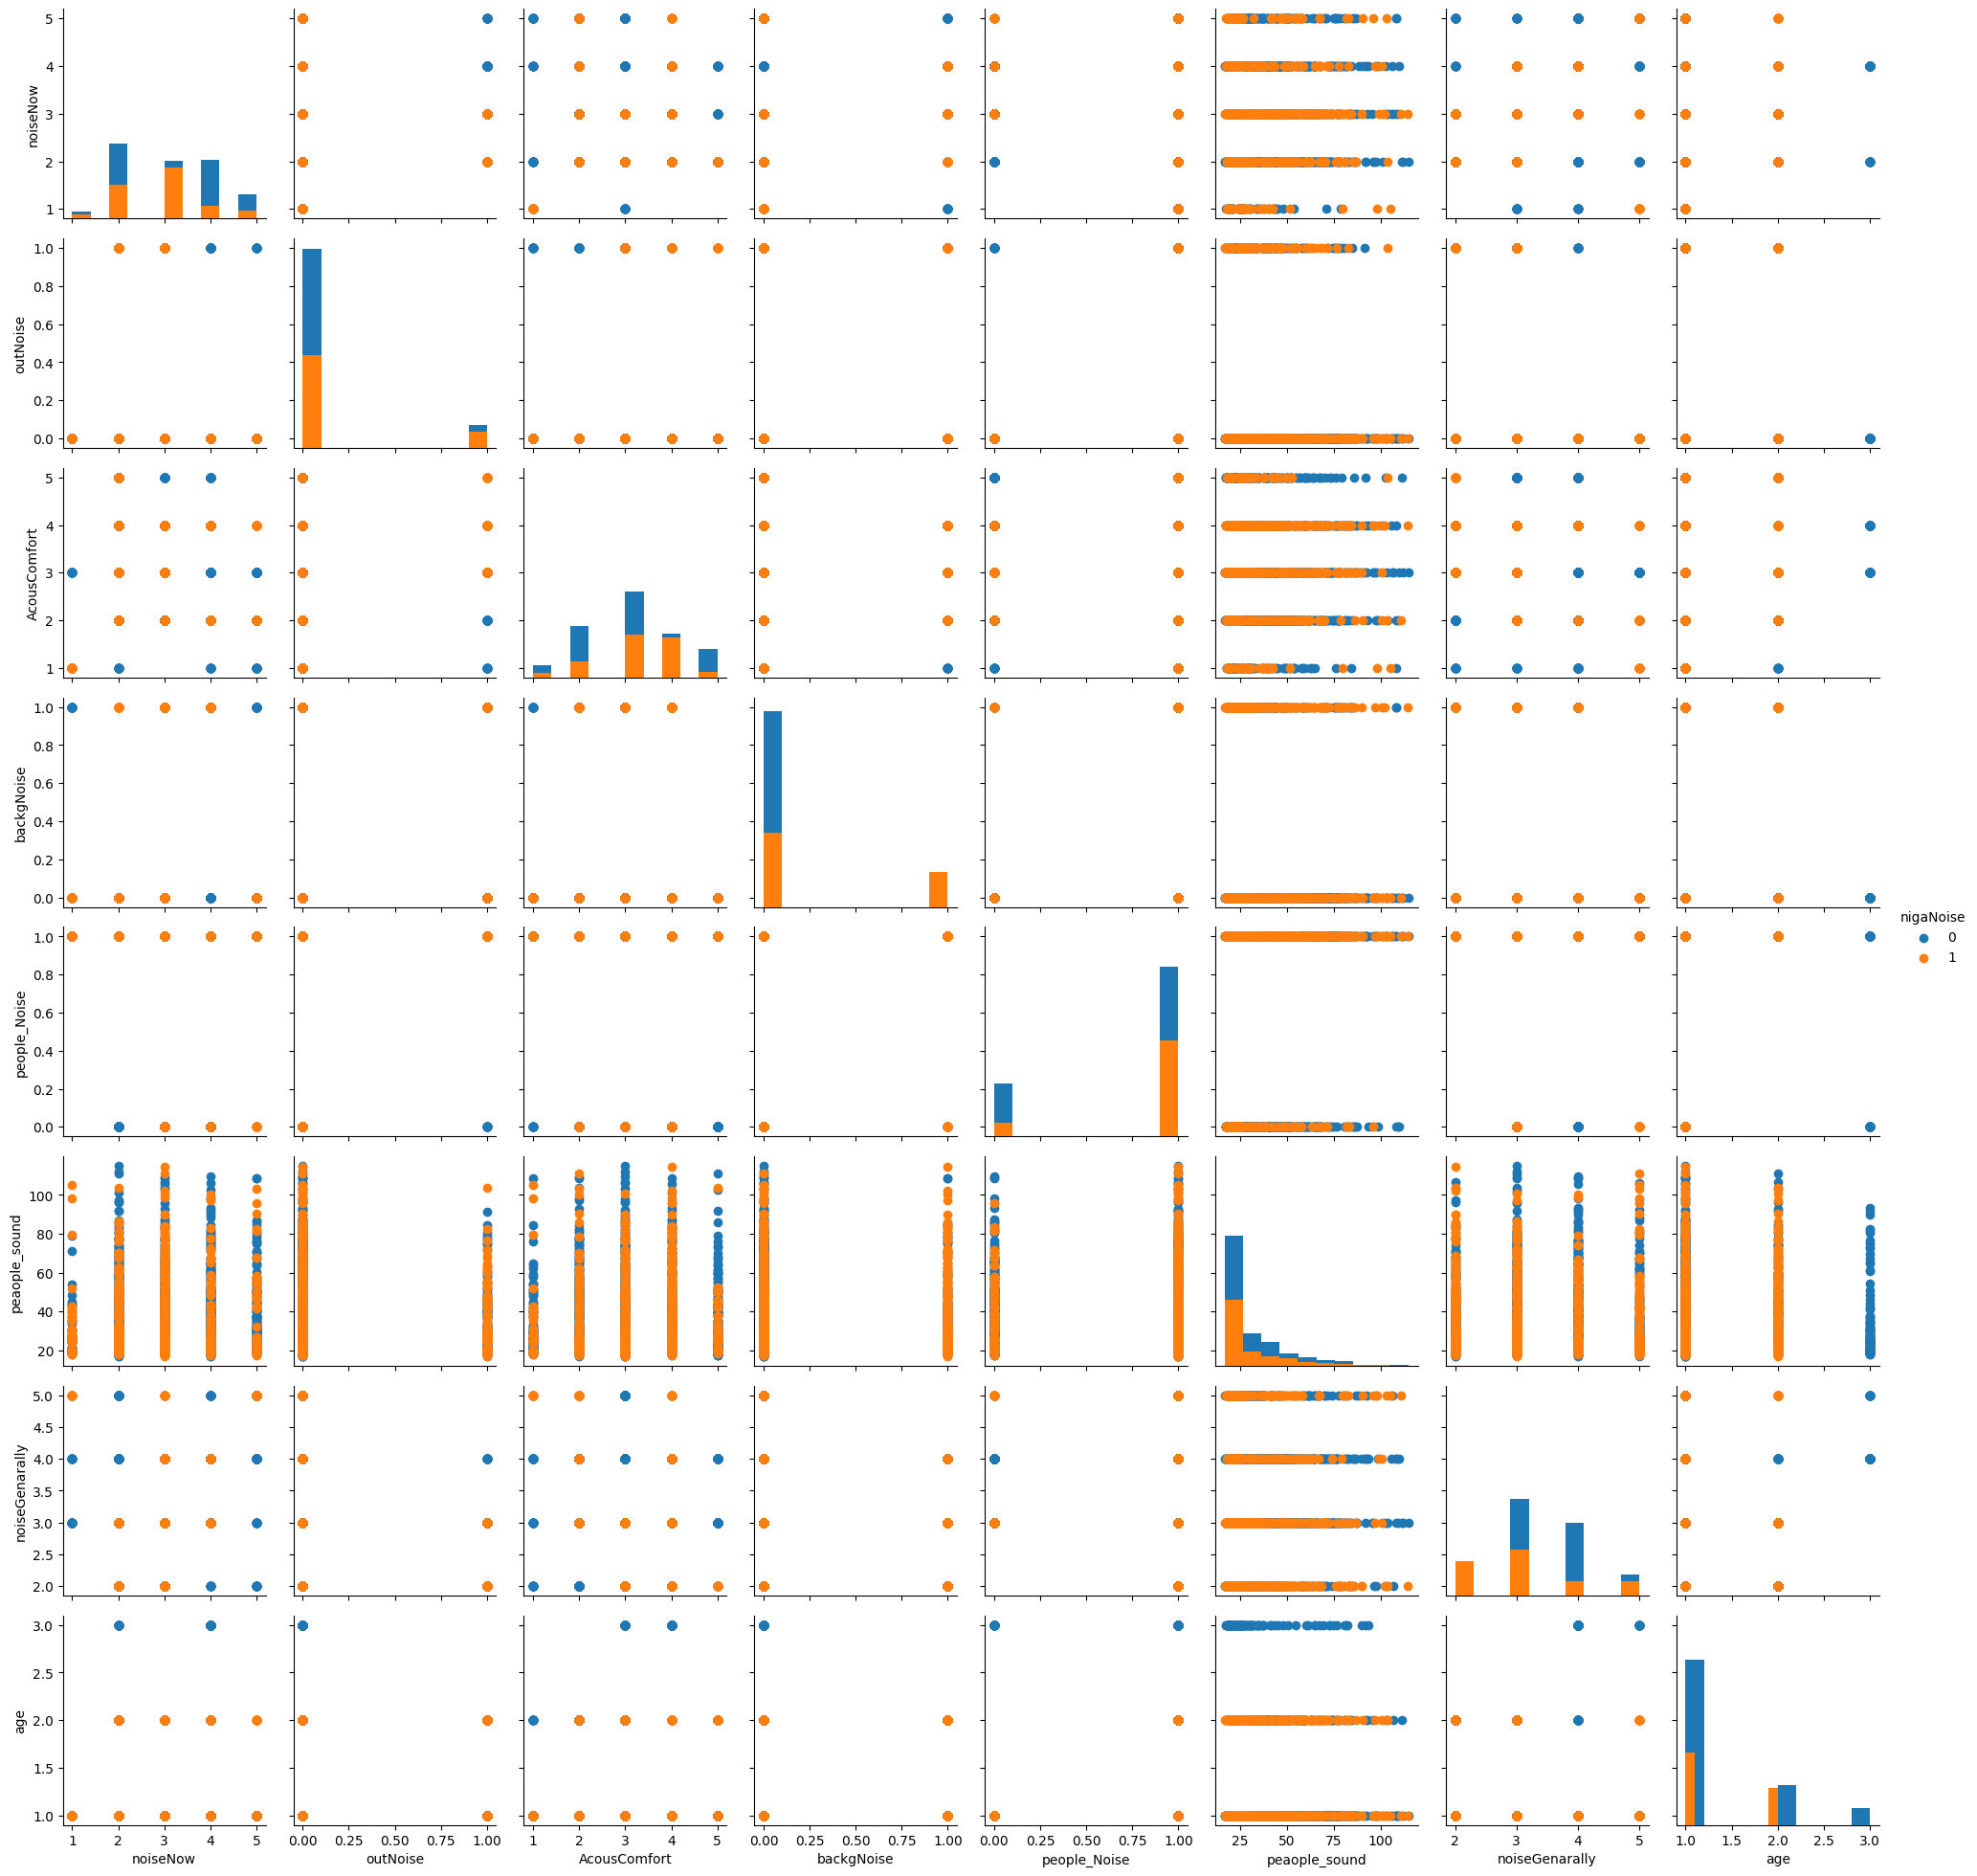

In [64]:
print(AuralComf.shape)
g = sns.PairGrid(AuralComf, hue="nigaNoise")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

/home/meqdad/Dropbox/Code packages/Meqdad_Bayesian_Belife_Network/venLap/lib/python3.11/site-packages/seaborn/axisgrid.py:181: UserWarning: The label '_nolegend_' of <matplotlib.patches.Patch object at 0x7f0a6b383f90> starts with '_'. It is thus excluded from the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


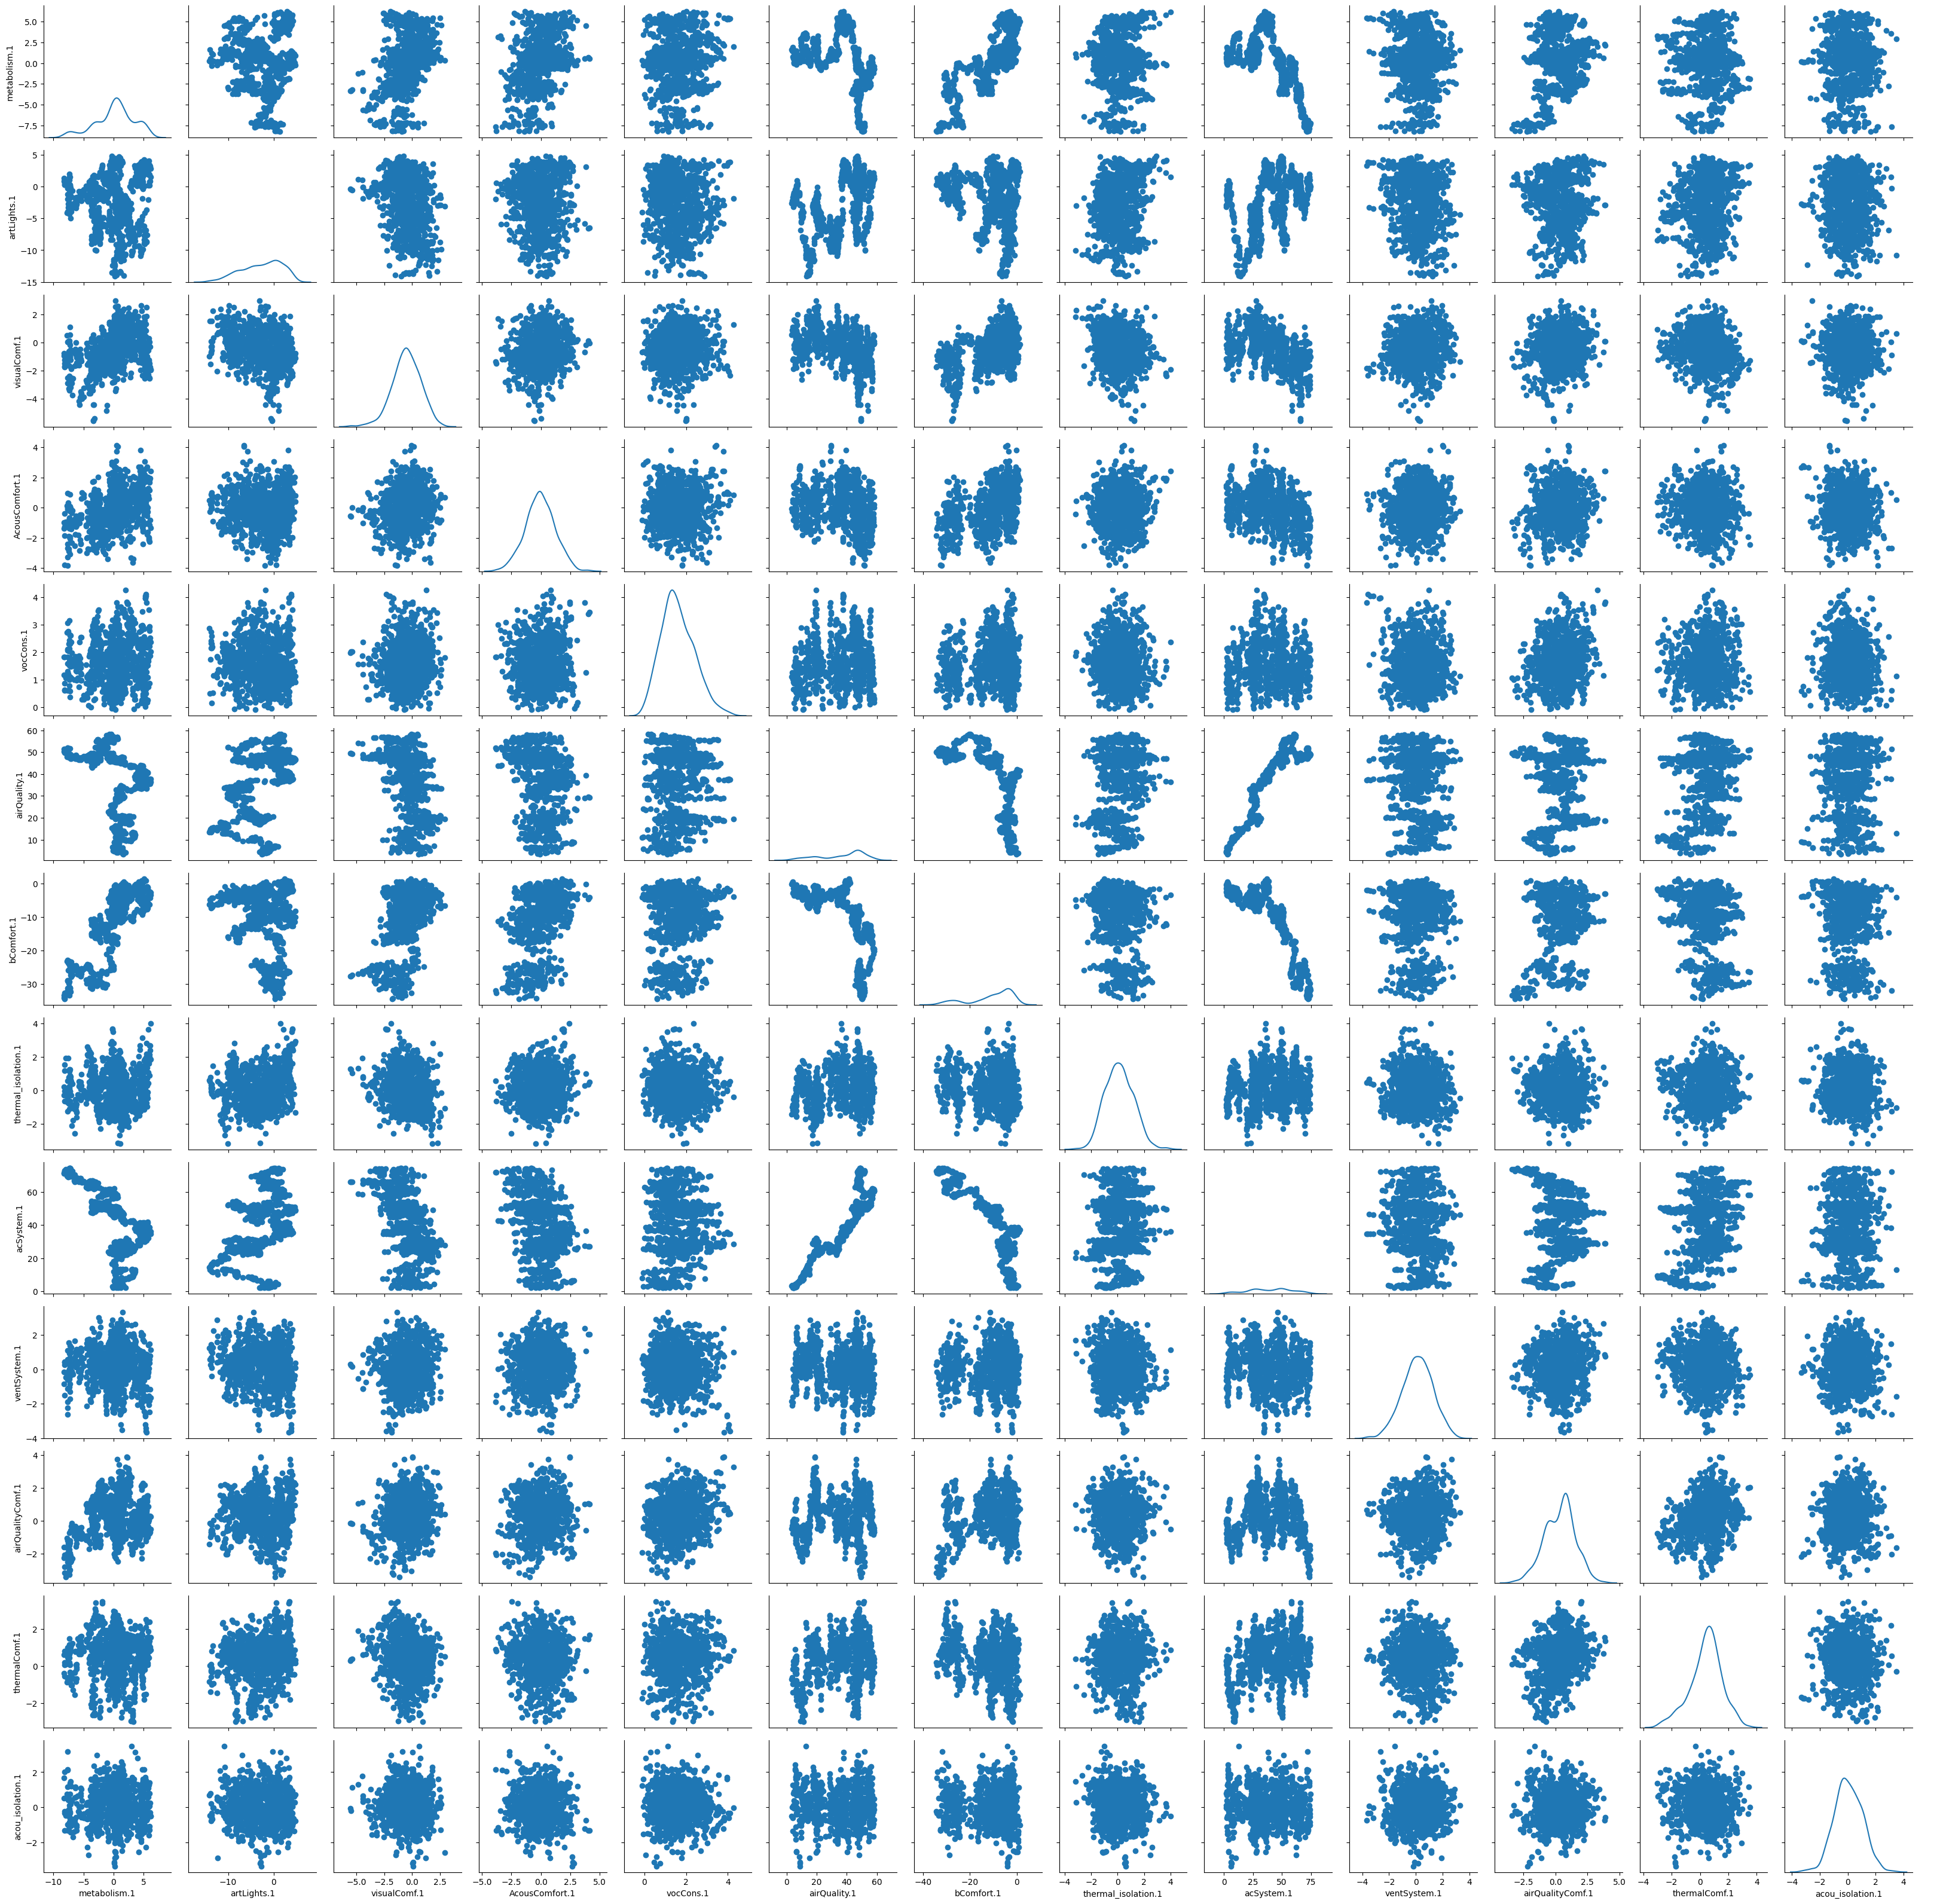

In [68]:
g = sns.PairGrid(OUtputResultTotalDF)
# g.map_diag(plt.hist)  
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter)
g.add_legend()

In [ ]:
g = sns.PairGrid(OUtputResultmeanDF, hue="bComfort.1")
# g.map_diag(sns.kdeplot)  
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

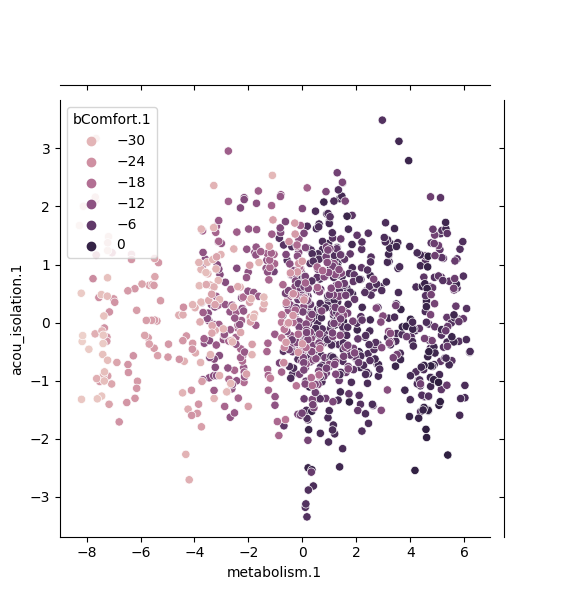

In [76]:
sns.jointplot(data=OUtputResultTotalDF, x="metabolism.1", y="acou_isolation.1", hue="bComfort.1")

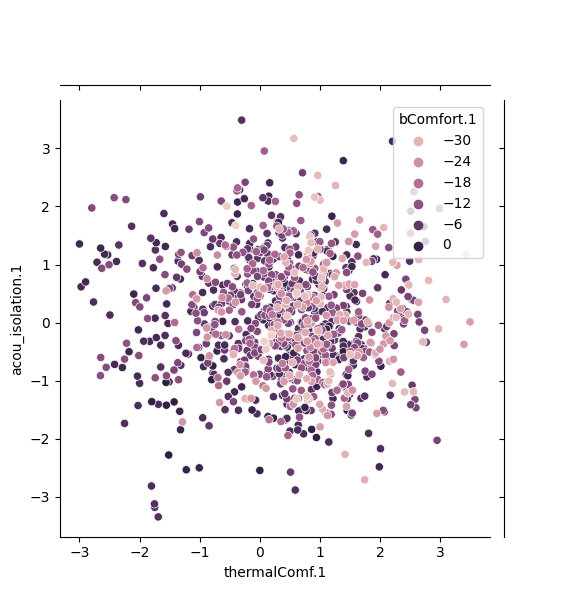

In [86]:
sns.jointplot(data=OUtputResultTotalDF[["thermalComf.1", "acou_isolation.1", "bComfort.1"]], x="thermalComf.1", y="acou_isolation.1", hue="bComfort.1")

In [ ]:
av.plot_pair(OUtputResultmeanDF.to_xarray())
plt.savefig("pair_plot.png")
av.plot_trace(OUtputResultmeanDF.to_xarray())
plt.savefig("trace_plot.png")
av.plot_posterior(OUtputResultmeanDF.to_xarray())
plt.savefig("posterior_plot.png")